## Project: Python Stack Overflow Developer Survey 2024

Intorduction
<br> We will use the StackOverflow developer survey dataset for our analysis. This is an annual survey conducted by StackOverflow, and you can find the raw data & results here: https://insights.stackoverflow.com/survey.

More than 65,000 developers participated in stack overflow annual survey in May 2024, answering questions on coding, tools and technologies they use and wish to learn, artificial intelligence, and working with developers. See the outcomes and discover what's new for users of Stack Overflow.

This project **Aims** to conduct exploratory data analysis (EDA) on a data set, specifically examining responses from a developers survey, to gain insights into the developer career space.

This project **Aims** to analyze a dataset and create visualizations to determine varisous aspects.

Project Overview:
<br> 1. Importing Packages and Loading Dataset
<br> 2. Data Cleaning & Exploration
<br> 3. Explanatory Data Analysis and Building Visualizations
<br> 4. Conclusion

### 1. Importing Packages and Loading Dataset.
For EDA of the data, begin by importing helpful packages such as `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn` and `plotly.express`.

In [7]:
# import packages for data manipulation
import pandas as pd
import numpy as np

# import RegEx Module
import re

# import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [13]:
# to check what's in the directory
import os
os.listdir('D:\\stack-overflow-developer-survey-2024')

['2024 Developer Survey.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

In [14]:
# load dataset into DataFrame
survey_raw_df = pd.read_csv('D:\\stack-overflow-developer-survey-2024\\survey_results_public.csv')

In [15]:
# to see all columns
pd.options.display.max_columns = None

In [16]:
survey_raw_df

ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                                Remote  Apples   
1      Employed, full-time                                Remote  Apples   
2      Employed, full-time                                Remote  Apples   
3       Student, full-time                                   NaN  Apples   
4       Student, full-time                                   NaN  Apples   
...                    ...                                   ...     ...   
65432  Employed, full-time                                Remote  Apples   
65433  Employed, full-time                                Remote  Apples   
65434  Employed, full-time                             In-person  Apples   
65435  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
65436   Student, full-time                                   NaN  Apples   

                                        CodingActivities  \
0                                                  Hobby   
1      Hobby;Contribute to open-source projects;Other...   
2      Hobby;Contribute to open-source projects;Other...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
65432                      Hobby;School or academic work   
65433           Hobby;Contribute to open-source projects   
65434                                              Hobby   
65435  Hobby;Contribute to open-source projects;Profe...   
65436                                                NaN   

                                                 EdLevel  \
0                              Primary/elementary school   
1           Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3      Some college/university study without earning ...   
4      Secondary school (e.g. American high school, G...   
...                                                  ...   
65432       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
65433                                                NaN   
65434       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
65435  Secondary school (e.g. American high school, G...   
65436                                                NaN   

                                               LearnCode  \
0                                 Books / Physical media   
1      Books / Physical media;Colleague;On the job tr...   
2      Books / Physical media;Colleague;On the job tr...   
3      Other online resources (e.g., videos, blogs, f...   
4      Other online resources (e.g., videos, blogs, f...   
...                                                  ...   
65432  On the job training;School (i.e., University, ...   
65433                                                NaN   
65434  Other online resources (e.g., videos, blogs, f...   
65435  On the job training;Other online resources (e....   
65436                                                NaN   

                                         LearnCodeOnli

In [17]:
# lets find the list of columns
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

- It shows that all column names are code of question which are given in schema.csv file.
- Now, we can refer to the schema file to see the full text of each question.

In [18]:
# load schema dataset into DataFrame
schema_raw_df = pd.read_csv('D:\\stack-overflow-developer-survey-2024\\survey_results_schema.csv')

In [19]:
schema_raw_df

qid            qname  \
0     QID2       MainBranch   
1   QID127              Age   
2   QID296       Employment   
3   QID308       RemoteWork   
4   QID341            Check   
..     ...              ...   
82  QID337   JobSatPoints_7   
83  QID337   JobSatPoints_8   
84  QID337   JobSatPoints_9   
85  QID337  JobSatPoints_10   
86  QID337  JobSatPoints_11   

                                             question force_resp type selector  
0   Which of the following options best describes ...       True   MC     SAVR  
1                                  What is your age?*       True   MC     SAVR  
2   Which of the following best describes your cur...       True   MC     MAVR  
3   Which best describes your current work situation?      False   MC     SAVR  
4   Just checking to make sure you are paying atte...       True   MC     SAVR  
..                                                ...        ...  ...      ...  
82  Learning and using new technology, including p...        NaN   MC     MAVR  
83  Designing and building environments, databases...        NaN   MC     MAVR  
84  Being a power user of a tool, developer langua...        NaN   MC     MAVR  
85       Working with new and/or top-quality hardware        NaN   MC     MAVR  
86  A well-staffed/sourced internal network that m...        NaN   MC     MAVR  

[87 rows x 6 columns]

- Each column in the data set represents the questions that were asked during the survey. A .pdf copy of the survey is included in the GitHub repository of this project for reference.

### 2. Data Cleaning and Exploration
The survey responses provide a lot of valuable information, but we will be focusing our analysis on specific areas:
<br> • Survey respondents' demographic information & the programming community around the world
<br> • Distribution of skills, preferences, and programming experience
<br> • Employment-related information, preferences & opinions

In [20]:
# get the size of the data
survey_raw_df.size

7459818

In [21]:
# get the shape of the data
survey_raw_df.shape

(65437, 114)

In [22]:
# get basic information about the data  
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


- Most columns have the data type is 'object', either because they contain values of different types, or they contain empty values, which are represented using NaN. It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows (65437). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.
- Only 13 of the columns were detected as numeric columns, even though there are a few other columns which have mostly numeric values. To make our analysis easier, we will convert some other columns into numeric data types, while ignoring any non-numeric value (they will get converted to NaNs).

In [23]:
# display the first few rows of the dataframe
survey_raw_df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

In [24]:
# get summary statistics on numeric columns
survey_raw_df.describe()

ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000        0.000000        0.000000         0.00000   
50%          0.000000        0.000000       20.000000        15.00000   
75%          5.000000       10.000000       30.000000        30.00000   
max        100.000000      100.000000      100.000000       100.00000   

       JobSatPoints_8  JobSatPoints_9  JobSatPoints_10  JobSatPoints_11  \
count    29456.000000    29456.000000     29450.000000     29445.000000   
mean        20.278165       16.169432        10.955713         9.953948   
std         26.108110       24.845032        22.906263        21.775652   
min          0.000000        0.000000         0.000000         0.000000   
25%          0.000000        0.000000         0.000000         0.000000   
50%         10.000000        5.000000         0.000000         0.000000   
75%         25.000000       20.000000        10.000000        10.000000   
max        100.000000      100.000000       100.000000       100.000000   

       ConvertedCompYearly        JobSat  
count         2.343500e+04  29126.000000  
mean          8.615529e+04      6.935041  
std           1.867570e+05      2.088259  
min           1.000000e+00      0.000000  
25%           3.271200e+04      6.000000  
50%           6.500000e+04      7.000000  
75%           1.079715e+05      8.000000  
max           1.625660e+07     10.000000

- The discribe() function shows everything good apperently but we will change the values according to questions

In [25]:
# check for missing values
survey_raw_df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

- The dataset contains numerous missing values due to optional survey questions or respondents dropping out. These values will be addressed based on the guiding question's needs.

### 3. Explanatory Data Analysis and Building Visualizations

#### 3.1 Developer Profile

##### 3.1.1 Education
To be a professional developer you need to have a proper degree.

In [26]:
# find the type of survey population
survey_raw_df['MainBranch'].value_counts(normalize=True)*100

MainBranch
I am a developer by profession                                                           76.725706
I am not primarily a developer, but I write code sometimes as part of my work/studies     9.950028
I am learning to code                                                                     5.921726
I code primarily as a hobby                                                               5.094977
I used to be a developer by profession, but no longer am                                  2.307563
Name: proportion, dtype: float64

- Mostly professional developers are answered the survey properly. This is expected as professional developers make up a large proportion (approximately 77%) of our survey population.

In [27]:
# check for missing values
print(survey_raw_df['EdLevel'].isnull().sum())

4653


In [28]:
# there have 1211 missing values in 'EdLevel' column, so we need to drop them all to get a clean data
EdLevel_clean_df = survey_raw_df['EdLevel'].dropna()

In [29]:
# checking if the data is cleaned or not
print(EdLevel_clean_df.isnull().sum())

0


In [30]:
# View value counts in 'EdLevel' column for counting the distinct 'EdLevel'
EdLevel_clean_df.value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

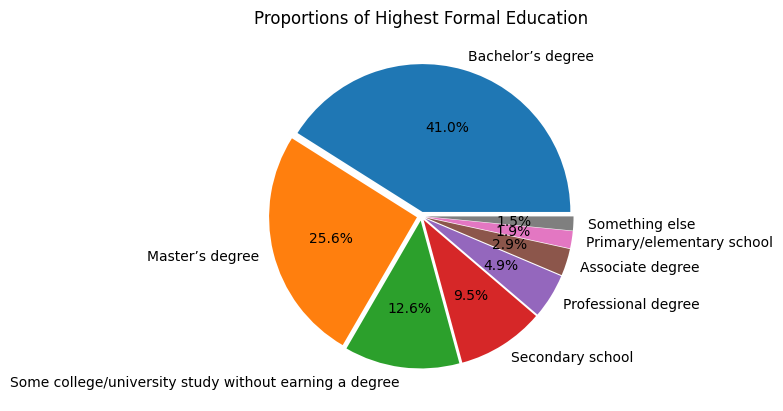

In [31]:
# Creating a pie graph of the values in the EdLevel column to explore the proportions of respondents across various highest formal education attained.
x = EdLevel_clean_df.value_counts()
y = ['Bachelor’s degree','Master’s degree','Some college/university study without earning a degree','Secondary school',
     'Professional degree','Associate degree','Primary/elementary school','Something else']
ex = [0.03]*8
plt.pie(x, labels=y, explode=ex, autopct='%.1f%%', textprops={'fontsize': 10});
plt.title('Proportions of Highest Formal Education');

- So, the pie chart shows the result for the question 'Which of the following best describes the highest level of formal education that you’ve completed?'
- 41.0% of respondents hold a Bachelor's degree, while 25.6% hold a Master's degree.
- The question remains: which degree is necessary for a profession career?

In [32]:
# so, in 'MainBranch' column we can find the professional developers
survey_raw_df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

In [33]:
# selecting developers from the dataframe and find what's their education level
dev_prof_df = survey_raw_df.loc[survey_raw_df['MainBranch'] == 'I am a developer by profession']
dev_prof_df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          21398
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13149
Some college/university study without earning a degree                                 5482
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2703
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         1919
Associate degree (A.A., A.S., etc.)                                                    1430
Something else                                                                          550
Primary/elementary school                                                               302
Name: count, dtype: int64

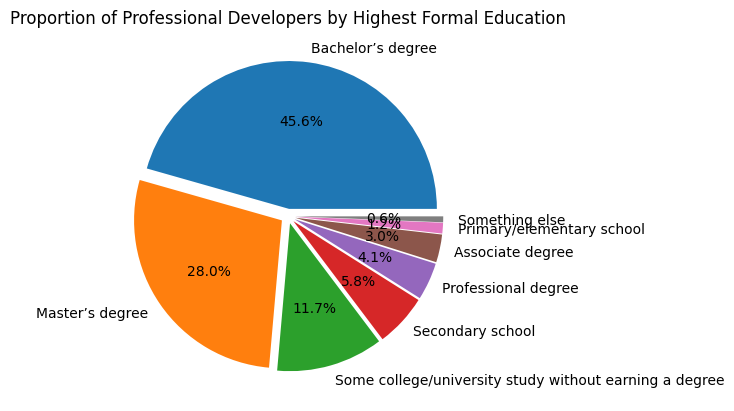

In [34]:
# Now creating a pie graph of the values in the EdLevel column for professional developers
x = dev_prof_df['EdLevel'].value_counts()
y = ['Bachelor’s degree','Master’s degree','Some college/university study without earning a degree','Secondary school',
     'Professional degree','Associate degree','Primary/elementary school','Something else']
ex = [0.05]*8
plt.pie(x, labels=y, explode=ex, autopct='%.1f%%');
plt.title('Proportion of Professional Developers by Highest Formal Education');

- Most developers (73.6% = 45.6% + 28.0%) have a post-secondary education, having completed some college or more.
- Most professional developers have attained a Bachelor's degree (45.6%) with a quarter attaining a Master's degree (28%).
- Most professional developers hold a degree, suggesting that higher education can potentially boost their chances of being hired as a developer.
- Most professional developers, around 45.6%, hold a Bachelor's degree, suggesting that while a Master's degree may increase the chances of securing a developer job, a Bachelor's degree may suffice.

##### 3.1.2 **Learning to Code**
- Coders and developers utilize diverse tools and resources to enhance their skills, offering a wide range of learning methods.
- The study aims to investigate the learning methods of all respondents, regardless of their age or code learning level.

In [35]:
survey_raw_df.LearnCode.value_counts()

LearnCode
Other online resources (e.g., videos, blogs, forum, online community)                                                                                                 3674
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community)                                                                          2493
Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)                                                         2362
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                          2286
Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                                                 2182
                                                                                                                                       

- Every row contained multiple answers separated by ';', preventing us from counting each answer individually.
- So, let's create a function to get the answers separately and top of it we will count the answers

In [36]:
def split_multi_ans_column(series):
    result_df = series.to_frame()
    options = []
    # iterate over the rows
    for id, value in series[series.notnull()].items():
        # break each 'value' into list of 'piece'
        for piece in value.split(';'):
            # add the 'piece' as a column to 'result_df' as False
            if not piece in result_df.columns:
                options.append(piece)
                result_df[piece]=False
            # mark the found 'value' in the 'piece' column as True
            result_df.at[id, piece]=True
    return result_df[options]

In [37]:
all_learn_code_separate_df = split_multi_ans_column(survey_raw_df.LearnCode)
all_learn_code_separate_df

Books / Physical media  Colleague  On the job training  \
0                        True      False                False   
1                        True       True                 True   
2                        True       True                 True   
3                       False      False                False   
4                       False      False                False   
...                       ...        ...                  ...   
65432                   False      False                 True   
65433                   False      False                False   
65434                   False      False                False   
65435                   False      False                 True   
65436                   False      False                False   

       Other online resources (e.g., videos, blogs, forum, online community)  \
0                                                  False                       
1                                                   True                       
2                                                   True                       
3                                                   True                       
4                                                   True                       
...                                                  ...                       
65432                                              False                       
65433                                              False                       
65434                                               True                       
65435                                               True                       
65436                                              False                       

       School (i.e., University, College, etc)  \
0                                        False   
1                                        False   
2                                         True   
3                                         True   
4                                        False   
...                                        ...   
65432                                     True   
65433                                    False   
65434                                    False   
65435                                    False   
65436                                    False   

       Online Courses or Certification  Coding Bootcamp  \
0                                False            False   
1                                False            False   
2                                False            False   
3                                 True            False   
4                                False            False   
...                                ...              ...   
65432                            False            False   
65433                            False            False   
65434                            False            False   
65435                            False            False   
65436                            False            False   

       Friend or family member  Other (please specify):  
0                        False                    False  
1                        False                    False  
2                        False                    False  
3                        False                    False  
4                        False                    False  
...                        ...                      ...  
65432                    False                    False  
65433                    False                    False  
65434                    False                    False  
65435                    False                    False  
65436                    False                    False  

[65437 rows x 9 columns]

- The learn_code_clean_separate_df has one column for each option that can be selected as a response. If a responded has selected the option, the value in the column is True, otherwise it is False.
- We can now use the column-wise totals to identify the most common roles.

In [38]:
# using split_multi_ans_column function
all_learn_code_separate_df_totals = all_learn_code_separate_df.sum().sort_values(ascending=False)
all_learn_code_separate_df_totals

Other online resources (e.g., videos, blogs, forum, online community)    49654
Books / Physical media                                                   30392
Online Courses or Certification                                          30271
School (i.e., University, College, etc)                                  29722
On the job training                                                      27244
Colleague                                                                14258
Coding Bootcamp                                                           6503
Friend or family member                                                   6378
Other (please specify):                                                   3635
dtype: int64

- We can also use the column-wise totals to identify the most common roles for new learners

In [39]:
learners_clean_separate_df = split_multi_ans_column(survey_raw_df['LearnCode'][survey_raw_df['MainBranch']=='I am learning to code'])
learners_clean_separate_df.sum().sort_values(ascending=False)

Other online resources (e.g., videos, blogs, forum, online community)    2637
Online Courses or Certification                                          1882
School (i.e., University, College, etc)                                  1723
Books / Physical media                                                   1291
Coding Bootcamp                                                           659
Friend or family member                                                   485
On the job training                                                       448
Colleague                                                                 386
Other (please specify):                                                   182
dtype: int64

- Now let's make a visual representation of how all members and learners acquired the skill of coding.

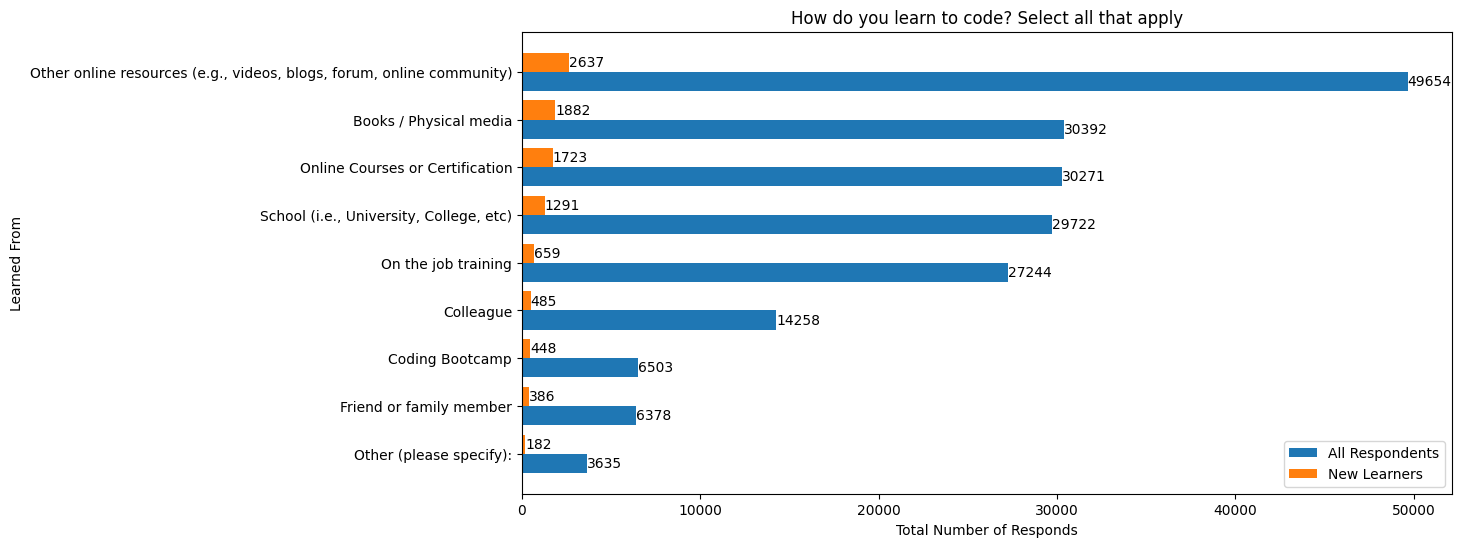

In [40]:
x = all_learn_code_separate_df.sum().sort_values(ascending=True).index
y = all_learn_code_separate_df.sum().sort_values(ascending=True).values
z = learners_clean_separate_df.sum().sort_values(ascending=True).values

fig, ax = plt.subplots(figsize=(12,6))
values = np.arange(len(x))
height=0.4
bar1 = plt.barh(values, y, height);
bar2 = plt.barh(values+height, z, height);
plt.yticks(values+0.2,x);

ax.bar_label(bar1);
ax.bar_label(bar2);

plt.legend(['All Respondents', 'New Learners']);
plt.xlabel('Total Number of Responds');
plt.ylabel('Learned From');
plt.title('How do you learn to code? Select all that apply');

- So, the bar chart answeres the question 'How do you learn to code? Select all that apply.'
- Respondents are most frequently selecting online resources (e.g., videos, blogs, forums) to learn from also the new learners are selecting online courses or certifications but still learn more from books as well.

- So, the question is which is the most popular online resources to learn code.

In [41]:
# using split_multi_ans_column function
online_resources_separate_df = split_multi_ans_column(survey_raw_df.LearnCodeOnline)
online_resources_separate_df.sum().sort_values(ascending=False)

Technical documentation                                        41267
Stack Overflow                                                 39492
Written Tutorials                                              33664
Blogs                                                          30208
How-to videos                                                  26668
Video-based Online Courses                                     24586
Books                                                          22892
Social Media                                                   20269
AI                                                             18247
Written-based Online Courses                                   16535
Interactive tutorial                                           14407
Online challenges (e.g., daily or weekly coding challenges)    11291
Coding sessions (live or recorded)                             10906
Certification videos                                            7146
Auditory material (e.g., podcasts)

- Let's visualize the data.

In [42]:
online_resources_df = online_resources_separate_df.sum().sort_values(ascending=False).rename_axis('resources').reset_index(name='no_of_respondents')
online_resources_df['pct'] = round(online_resources_df.no_of_respondents / online_resources_df.no_of_respondents.sum() * 100, 2)
online_resources_df

resources  no_of_respondents  \
0                             Technical documentation              41267   
1                                      Stack Overflow              39492   
2                                   Written Tutorials              33664   
3                                               Blogs              30208   
4                                       How-to videos              26668   
5                          Video-based Online Courses              24586   
6                                               Books              22892   
7                                        Social Media              20269   
8                                                  AI              18247   
9                        Written-based Online Courses              16535   
10                               Interactive tutorial              14407   
11  Online challenges (e.g., daily or weekly codin...              11291   
12                 Coding sessions (live or recorded)              10906   
13                               Certification videos               7146   
14                 Auditory material (e.g., podcasts)               3955   
15                                  Programming Games               3000   
16                            Other (Please specify):                840   

      pct  
0   12.68  
1   12.14  
2   10.35  
3    9.28  
4    8.20  
5    7.56  
6    7.04  
7    6.23  
8    5.61  
9    5.08  
10   4.43  
11   3.47  
12   3.35  
13   2.20  
14   1.22  
15   0.92  
16   0.26

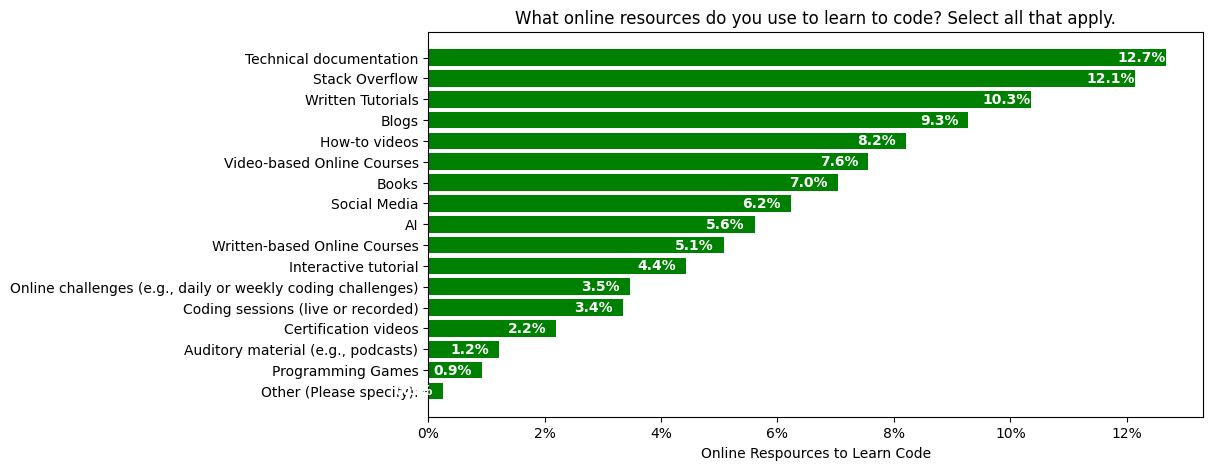

In [43]:
x = online_resources_df.sort_values(by=['pct'], ascending=True).resources
y = online_resources_df.pct.sort_values()
fig, ax = plt.subplots(figsize=(10,5))
bar = plt.barh(x, y, color='g');
ax.bar_label(bar, padding=-35, fmt='%.1f%%', color='white', label_type='edge', fontweight='bold');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0, decimals=0))

plt.xlabel('Number of Respondents');
plt.xlabel('Online Respources to Learn Code');
plt.title('What online resources do you use to learn to code? Select all that apply.');

- The most popular online tools for learning to code are **technical documentation** and **Stack Overflow**, with **written tutorials** completing the top three. Having well-written documentation, a vibrant community offering answers, and frequent posts are all necessary to help individuals become self-taught technology users.
- Other tools like as blogs, how-to videos, online cources, and books are also valuable to developers, who put together the materials and forms that best suit their learning preferences.


##### 3.1.3 **Experience**
- Coder experience is not about years of dedication, but about making the coding process enjoyable, which can enhance creativity, productivity, and learning, rather than solely focusing on the duration of development.

In [44]:
survey_raw_df.YearsCode

0        NaN
1         20
2         37
3          4
4          9
        ... 
65432      5
65433    NaN
65434      9
65435      5
65436    NaN
Name: YearsCode, Length: 65437, dtype: object

In [45]:
survey_raw_df.YearsCode.dropna().unique()

array(['20', '37', '4', '9', '10', '7', '1', '15', '30', '31', '6', '12',
       '22', '5', '36', '25', '44', '24', '18', '3', '8',
       'More than 50 years', '11', '29', '40', '39', '2', '42', '34',
       '19', '35', '16', '33', '13', '23', '14', '28', '17', '21', '43',
       '46', '26', '32', '41', '45', '27', '38', '50', '48', '47',
       'Less than 1 year', '49'], dtype=object)

- dtype of 'YearsCode' column is a 'object' so, we cannot perform numeric operation to the said column.
- So, we need to change the dtype of the said column to numeric but there is alpha-numeric value so we cannot change the dtype to numeric but we can change the alpha-numeric value to a integer value then only we change the dtype of the said column.

In [46]:
survey_raw_df.loc[survey_raw_df.YearsCode == 'Less than 1 year', 'YearsCode'] = 0
survey_raw_df.loc[survey_raw_df.YearsCode == 'More than 50 years', 'YearsCode'] = 51
survey_raw_df.YearsCode.dropna().unique()

array(['20', '37', '4', '9', '10', '7', '1', '15', '30', '31', '6', '12',
       '22', '5', '36', '25', '44', '24', '18', '3', '8', 51, '11', '29',
       '40', '39', '2', '42', '34', '19', '35', '16', '33', '13', '23',
       '14', '28', '17', '21', '43', '46', '26', '32', '41', '45', '27',
       '38', '50', '48', '47', 0, '49'], dtype=object)

- So. we are successfully changed the alpha-numeric value 'Less than 1 year' to -1 and 'More than 50 years' to 51 so that we can use them later in visualization.
- Now, we can change the dtype of the said column.

In [47]:
survey_raw_df['YearsCode_int'] = survey_raw_df.YearsCode.dropna().astype('int64')
survey_raw_df.YearsCode_int.dropna().unique() # dropping NaN and finding unique values

array([20., 37.,  4.,  9., 10.,  7.,  1., 15., 30., 31.,  6., 12., 22.,
        5., 36., 25., 44., 24., 18.,  3.,  8., 51., 11., 29., 40., 39.,
        2., 42., 34., 19., 35., 16., 33., 13., 23., 14., 28., 17., 21.,
       43., 46., 26., 32., 41., 45., 27., 38., 50., 48., 47.,  0., 49.])

- There have so many unique values in the 'YearsCode_int' column so we cannot visualize a perfect bar plot. So, we are going to make few bins that can help us to create a perfect bar plot.

In [48]:
cutoff = [-1, 0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 99]
label = ('less than 1 year', '1 to 4 years','5 to 9 years','10 to 14 years','15 to 19 years','20 to 24 years',
         '25 to 29 years','30 to 34 years','35 to 39 years','40 to 44 years','45 to 49 years','More than 50 years')
survey_raw_df['YearsCode_int_bin'] = pd.cut(survey_raw_df['YearsCode_int'], bins = cutoff, labels = label)
YearsCode_int_bin_df = survey_raw_df['YearsCode_int_bin'].value_counts()
YearsCode_int_bin_df

YearsCode_int_bin
5 to 9 years          16252
10 to 14 years        12055
1 to 4 years           8162
15 to 19 years         7041
20 to 24 years         5504
25 to 29 years         3591
30 to 34 years         2447
40 to 44 years         1797
35 to 39 years         1604
less than 1 year        569
45 to 49 years          516
More than 50 years      331
Name: count, dtype: int64

- Let's create a percentage column so that we can know the percentage-wise bins

In [49]:
YearsCode_int_bin_df = YearsCode_int_bin_df.rename_axis('types').reset_index(name='counts') # renameing and reindexing columns

In [50]:
YearsCode_int_bin_df['pct'] = round(YearsCode_int_bin_df.counts / YearsCode_int_bin_df.counts.sum() * 100, 2)
YearsCode_int_bin_df

types  counts    pct
0         5 to 9 years   16252  27.15
1       10 to 14 years   12055  20.14
2         1 to 4 years    8162  13.63
3       15 to 19 years    7041  11.76
4       20 to 24 years    5504   9.19
5       25 to 29 years    3591   6.00
6       30 to 34 years    2447   4.09
7       40 to 44 years    1797   3.00
8       35 to 39 years    1604   2.68
9     less than 1 year     569   0.95
10      45 to 49 years     516   0.86
11  More than 50 years     331   0.55

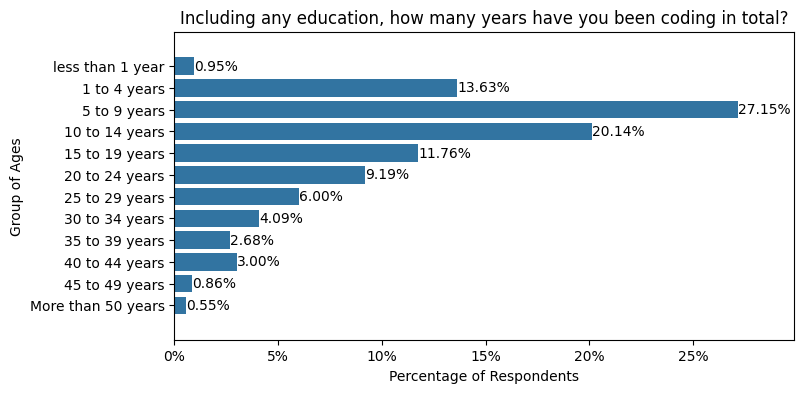

In [51]:
plt.subplots(figsize=(8,4));
x_ax = YearsCode_int_bin_df.pct
y_ax = YearsCode_int_bin_df.types
ax = sns.barplot(data=YearsCode_int_bin_df, y=y_ax, x=x_ax);

ax.margins(0.1);
ax.bar_label(ax.containers[0], fmt='%.2f%%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0, decimals=0))

plt.xlabel('Percentage of Respondents');
plt.ylabel('Group of Ages');
plt.title('Including any education, how many years have you been coding in total?');

- So, 41.73% (0.95+13.63+27.15) of respondents have been coding for less than ten years.

In [52]:
survey_raw_df.YearsCode_int.mean()

np.float64(14.197497870350265)

- So, we can say that it takes an average of almost 14 years to become proficient at coding.
- Let's now determine which nation has the most experienced programmers.

In [53]:
most_exp_coder_df = survey_raw_df.Country.loc[survey_raw_df.YearsCode_int > survey_raw_df.YearsCode_int.mean()].dropna().value_counts()
most_exp_coder_df = most_exp_coder_df.rename_axis('country').reset_index(name='count')
most_exp_coder_df

country  count
0                             United States of America   5476
1                                              Germany   2102
2    United Kingdom of Great Britain and Northern I...   1651
3                                               Canada    955
4                                               France    821
..                                                 ...    ...
149                                         San Marino      1
150                                            Senegal      1
151                                             Belize      1
152                                               Fiji      1
153                                             Malawi      1

[154 rows x 2 columns]

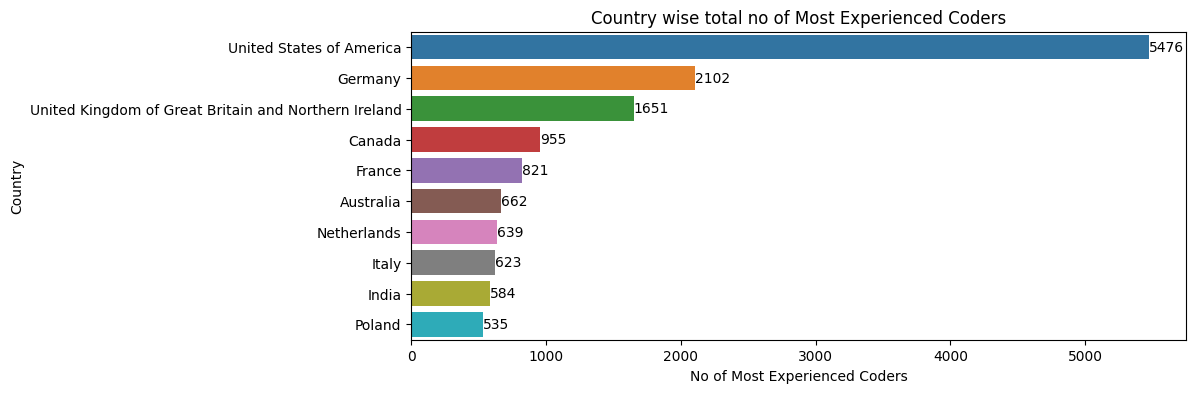

In [54]:
plt.subplots(figsize=(10,4))
ax = sns.barplot(data=most_exp_coder_df.head(10), x='count', y='country', hue='country');
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('No of Most Experienced Coders');
plt.ylabel('Country');
plt.title('Country wise total no of Most Experienced Coders');

- With an average of 13 to 14 years of coding expertise, the responders from the United States, Germany, and the United Kingdom had the greatest experience.

##### 3.1.4 **Developer Roles**
- A software developer's responsibilities include overseeing programming, testing software, designing software, creating models or diagrams to communicate goals, and mapping out future software upgrades, all of which are crucial tasks.

- Let's find out current job type / developer type.

In [55]:
# 'DevType' consists of developer type and each respondents responded only one answer
DevType_df = survey_raw_df.DevType.dropna().rename_axis('values').reset_index(name='type')
DevType_df

values                   type
0           1  Developer, full-stack
1           2   Developer Experience
2           3  Developer, full-stack
3           4  Developer, full-stack
4           5                Student
...       ...                    ...
59440   65428    Developer, back-end
59441   65431  Developer, full-stack
59442   65432             Blockchain
59443   65434      Developer, mobile
59444   65435    Developer, back-end

[59445 rows x 2 columns]

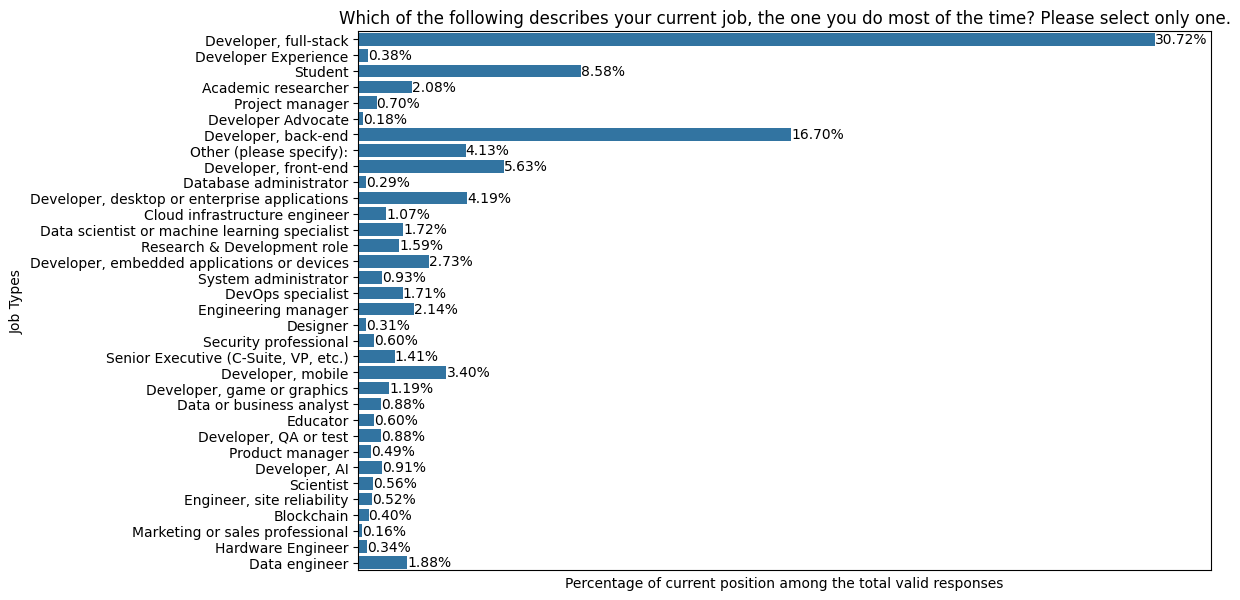

In [56]:
fig, ax = plt.subplots(figsize=(11,7))
cnt_plot = sns.countplot(y='type', data=DevType_df);
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/DevType_df.type.count())*100:0.2f}%');
ax.margins(x=0.07);
ax.set_xticks([]);
plt.xlabel('Percentage of current position among the total valid responses');
plt.ylabel('Job Types');
plt.title('Which of the following describes your current job, the one you do most of the time? Please select only one.');

- Full-stack, back-end, and front-end developers were the top three roles reported by developers.

##### 3.1.5 **Key Territories**
- Developers and engineers use Stack Overflow to learn and exchange information all across the world. Nearly every nation on Earth submitted replies to the survey.

- Let's see which nation responded most.

In [57]:
# first of all let's find response wise top 10 contries
country_df = survey_raw_df.Country.dropna().groupby([survey_raw_df.Country.dropna().values]).agg('count').sort_values(ascending=False).rename_axis('country').reset_index(name='counts')
country_df

country  counts
0                             United States of America   11095
1                                              Germany    4947
2                                                India    4231
3    United Kingdom of Great Britain and Northern I...    3224
4                                              Ukraine    2672
..                                                 ...     ...
180                                   Papua New Guinea       1
181                                              Niger       1
182                                              Nauru       1
183                 Micronesia, Federated States of...       1
184                                            Lesotho       1

[185 rows x 2 columns]

In [58]:
axis_x=country_df.counts.head(10)
axis_y=country_df.country.head(10)
fig, ax = plt.subplots(figsize=(6.5,3.5))
sns_bar = sns.barplot(x=axis_x, y=axis_y);
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/country_df.counts.sum())*100:0.2f}%');
ax.margins(x=0.12);
ax.set_xticks([]);
plt.xlabel('No. of responses');
plt.ylabel('Country Name');
plt.title('Where do you live?');

- The largest percentage of survey replies (34%) came from the United States, Germany and India. Europe accounts for most of the top-responding countries.

##### 3.1.6 **Demographics**
- statistics that describe populations and their characteristics.

In [59]:
all_respond_df = survey_raw_df['Age'].value_counts().rename_axis('age').reset_index(name='counts')
all_respond_df

age  counts
0     25-34 years old   23911
1     35-44 years old   14942
2     18-24 years old   14098
3     45-54 years old    6249
4     55-64 years old    2575
5  Under 18 years old    2568
6   65 years or older     772
7   Prefer not to say     322

In [60]:
code_learner_df = survey_raw_df['Age'].loc[survey_raw_df.MainBranch == 'I am learning to code'].value_counts().rename_axis('age').reset_index(name='counts')
code_learner_df

age  counts
0     18-24 years old    2149
1     25-34 years old     607
2  Under 18 years old     591
3     35-44 years old     279
4     45-54 years old     125
5     55-64 years old      55
6   Prefer not to say      39
7   65 years or older      30

In [61]:
prof_develop_df = survey_raw_df['Age'].loc[survey_raw_df.MainBranch == 'I am a developer by profession'].value_counts().rename_axis('age').reset_index(name='counts')
prof_develop_df

age  counts
0     25-34 years old   20887
1     35-44 years old   12705
2     18-24 years old    9032
3     45-54 years old    4937
4     55-64 years old    1850
5   65 years or older     353
6  Under 18 years old     296
7   Prefer not to say     147

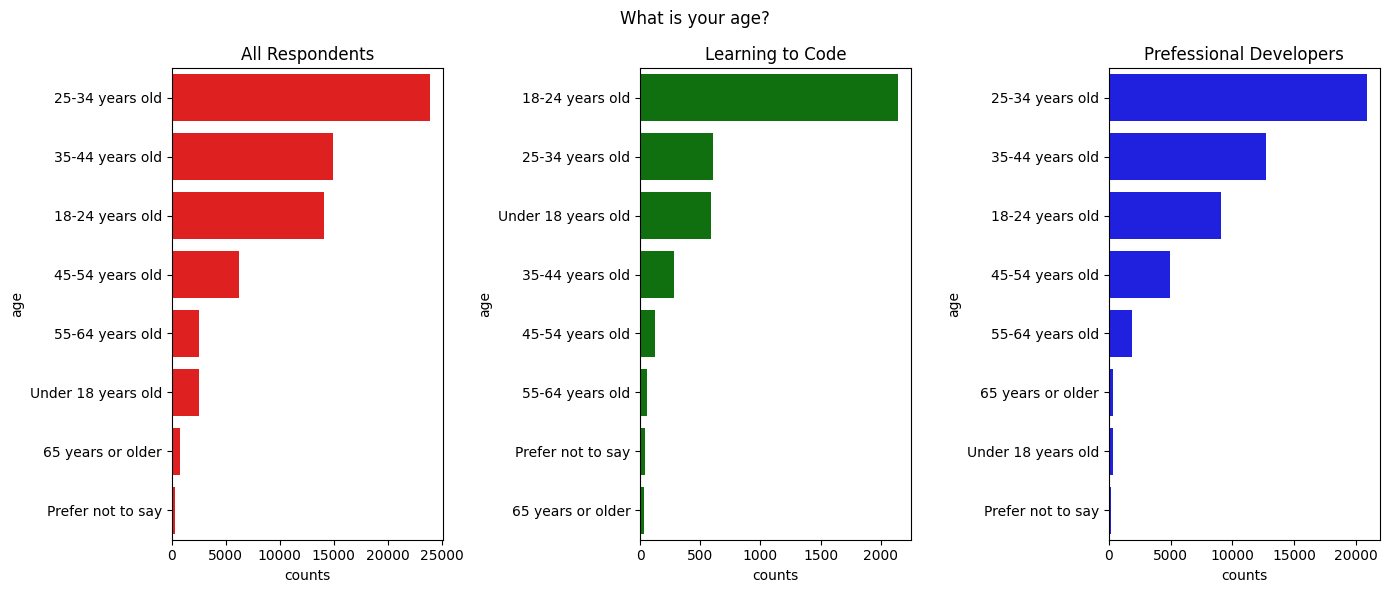

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(14,6));
plt.tight_layout(pad=9)
plt.suptitle('What is your age?')

plt.subplot(1,3,1)
sns.barplot(x=all_respond_df.counts, y=all_respond_df.age, color='r');
plt.title('All Respondents')

plt.subplot(1,3,2)
sns.barplot(x=code_learner_df.counts, y=code_learner_df.age, color='g');
plt.title('Learning to Code')

plt.subplot(1,3,3)
sns.barplot(x=prof_develop_df.counts, y=prof_develop_df.age, color='b');
plt.title('Prefessional Developers');
plt.tight_layout();

- The age range of 25–34 comprise of Professional Developers.
- But as can be seen, the majority of respondents who are learning to code are between the ages of 18 and 24.

#### 3.2 Technology

##### 3.2.1 Most popular technologies

- Which **programming, scripting, and markup languages** have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)

In [63]:
lang_worked_df = split_multi_ans_column(survey_raw_df.LanguageHaveWorkedWith).sum().sort_values(ascending=False)
lang_worked_top10_df = lang_worked_df.head(10)
lang_worked_top10_df

JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
dtype: int64

In [64]:
fig, ax = plt.subplots(figsize=(10,4))
ax.margins(x=0.08)

sns.barplot(x=lang_worked_top10_df.values, y=lang_worked_top10_df.index);
ax.bar_label(ax.containers[0], fmt=lambda x:f'{(x / lang_worked_df.values.sum())*100:0.2f}%');
ax.set_xticks([]);
plt.xlabel('Percentage of Lang users');
plt.ylabel('Lang Used');
plt.title('Programming, Scripting, and Markup Languages');

- JavaScript has been a mainstay in the developer survey.

- Which **database environments** have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)

In [65]:
db_worked_df = split_multi_ans_column(survey_raw_df.DatabaseHaveWorkedWith).sum().sort_values(ascending=False)
db_worked_top10_df = db_worked_df.head(10)
db_worked_top10_df

PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
dtype: int64

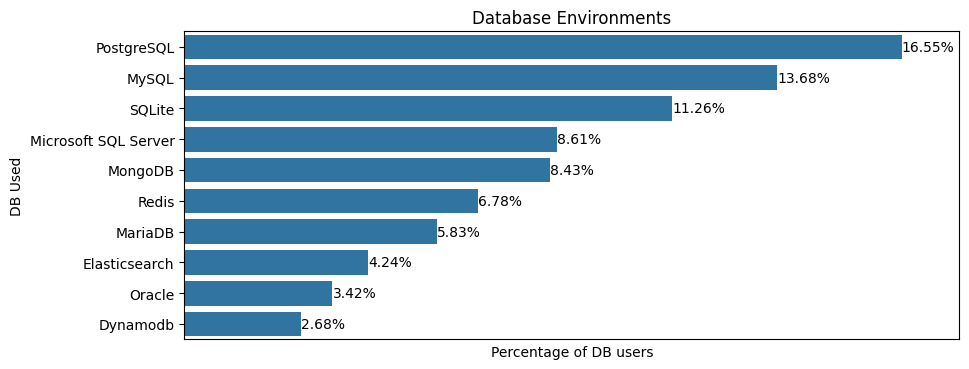

In [66]:
fig, ax = plt.subplots(figsize=(10,4))
ax.margins(x=0.08)

sns.barplot(x=db_worked_top10_df.values, y=db_worked_top10_df.index);
ax.bar_label(ax.containers[0], fmt=lambda x:f'{(x / db_worked_df.values.sum())*100:0.2f}%');
ax.set_xticks([]);
plt.xlabel('Percentage of DB users');
plt.ylabel('DB Used');
plt.title('Database Environments');

- PostgreSQL is used by 16.55% of developers.

- Which **cloud platforms** have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the platform and want to continue to do so, please check both boxes in that row.)

In [67]:
platform_worked_df = split_multi_ans_column(survey_raw_df.PlatformHaveWorkedWith).sum().sort_values(ascending=False)
platform_worked_top10_df = platform_worked_df.head(10)
platform_worked_top10_df

Amazon Web Services (AWS)    22191
Microsoft Azure              12850
Google Cloud                 11605
Cloudflare                    6974
Firebase                      6443
Vercel                        5491
Digital Ocean                 5409
Heroku                        3798
Netlify                       3238
VMware                        3043
dtype: int64

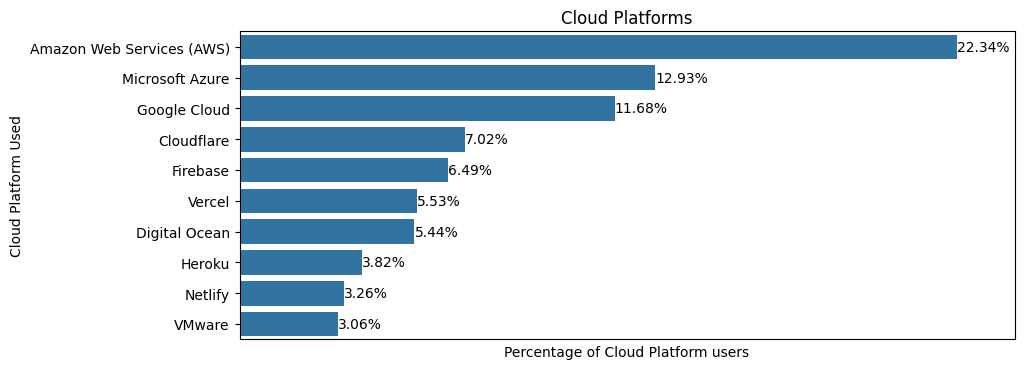

In [68]:
fig, ax = plt.subplots(figsize=(10,4))
ax.margins(x=0.08)

sns.barplot(x=platform_worked_top10_df.values, y=platform_worked_top10_df.index);
ax.bar_label(ax.containers[0], fmt=lambda x:f'{(x / platform_worked_df.values.sum())*100:0.2f}%');
ax.set_xticks([]);
plt.xlabel('Percentage of Cloud Platform users');
plt.ylabel('Cloud Platform Used');
plt.title('Cloud Platforms');

- AWS share of usage amongst respondents is the most.

- What is the primary **operating system** in which you work?

In [69]:
os_personal_use_df = split_multi_ans_column(survey_raw_df['OpSysPersonal use']).sum().sort_values(ascending=False).rename_axis('os').reset_index(name='personal')
os_personal_use_df

os  personal
0                             Windows     34691
1                               MacOS     18633
2                              Ubuntu     16205
3                             Android     10471
4   Windows Subsystem for Linux (WSL)     10042
5                                 iOS      6718
6                              Debian      5767
7                   Other Linux-based      4944
8                                Arch      4711
9                              iPadOS      3081
10                             Fedora      2785
11            Other (please specify):      1521
12                            Red Hat      1328
13                           ChromeOS      1023
14                             Cygwin       631
15                                BSD       584
16                            Solaris       200
17                                AIX       199
18                              Haiku       127

In [70]:
os_pro_use_df = split_multi_ans_column(survey_raw_df['OpSysProfessional use']).sum().sort_values(ascending=False).rename_axis('os').reset_index(name='professional')
os_pro_use_df

os  professional
0                             Windows         27918
1                               MacOS         18625
2                              Ubuntu         16237
3   Windows Subsystem for Linux (WSL)          9859
4                              Debian          5327
5                             Android          4931
6                   Other Linux-based          4697
7                                 iOS          4280
8                             Red Hat          2858
9                                Arch          2521
10                             Fedora          1935
11                             iPadOS          1562
12            Other (please specify):          1209
13                           ChromeOS           689
14                             Cygwin           581
15                                BSD           403
16                                AIX           292
17                            Solaris           233
18                              Haiku            86

In [71]:
merge_os_df = pd.merge(os_personal_use_df, os_pro_use_df, on='os', how='outer')
merge_os_df

os  personal  professional
0                                 AIX       199           292
1                             Android     10471          4931
2                                Arch      4711          2521
3                                 BSD       584           403
4                            ChromeOS      1023           689
5                              Cygwin       631           581
6                              Debian      5767          5327
7                              Fedora      2785          1935
8                               Haiku       127            86
9                               MacOS     18633         18625
10            Other (please specify):      1521          1209
11                  Other Linux-based      4944          4697
12                            Red Hat      1328          2858
13                            Solaris       200           233
14                             Ubuntu     16205         16237
15                            Windows     34691         27918
16  Windows Subsystem for Linux (WSL)     10042          9859
17                                iOS      6718          4280
18                             iPadOS      3081          1562

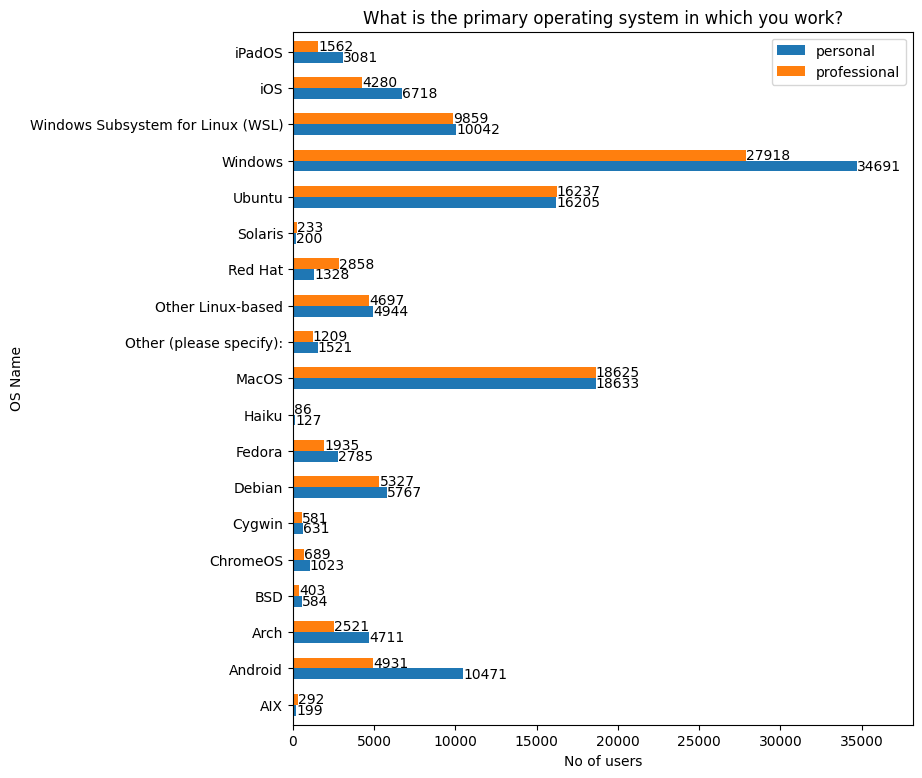

In [72]:
ax = merge_os_df.plot(kind='barh', x='os', y=['personal', 'professional'], figsize=(8,9), width=0.6);
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.margins(0.1);
plt.xlabel('No of users');
plt.ylabel('OS Name');
plt.title('What is the primary operating system in which you work?');

- Windows is the most popular operating system for developers, across both personal and professional use.

##### 3.2.2 Admired and Desired

- Let's see what language desired and what language is admired is most.

In [73]:
df1 = split_multi_ans_column(survey_raw_df['LanguageWantToWorkWith']).sum().rename_axis('lang').reset_index(name='desired')
df1

lang  desired
0   Bash/Shell (all shells)    13744
1                        Go    13837
2                  HTML/CSS    20721
3                      Java    10668
4                JavaScript    23774
5                    Kotlin     7379
6                    Python    25047
7                TypeScript    20239
8                        C#    12921
9                PowerShell     4287
10                      SQL    22400
11                      C++    10873
12                      Lua     3322
13                    Swift     3877
14                        R     2177
15                  Crystal      407
16                     Ruby     2774
17                     Rust    17232
18                      VBA      723
19                        C     8275
20                      PHP     5745
21                       F#     1272
22                  Clojure     1331
23                    Julia     1263
24                    Scala     1790
25                      Zig     3688
26                     Dart     3709
27                 Assembly     3007
28                 Solidity      957
29                   Elixir     2895
30                    Cobol      399
31                  Fortran      487
32                   Delphi      594
33                    OCaml     1080
34                     Lisp     1255
35                  Haskell     2221
36                     Perl      794
37                   Erlang     1137
38                   Groovy      849
39      Visual Basic (.Net)      962
40                 GDScript     1667
41                   MATLAB      945
42                   Prolog      396
43              Objective-C      686
44                      Nim      499
45                     Apex      389
46              MicroPython     1039
47                   Zephyr      248
48                      Ada      558

In [74]:
df2 = split_multi_ans_column(survey_raw_df['LanguageAdmired']).sum().rename_axis('lang').reset_index(name='admireddd')
df2['admired'] = df2['admireddd'] * -1
df2

lang  admireddd  admired
0   Bash/Shell (all shells)      12776   -12776
1                        Go       5485    -5485
2                  HTML/CSS      19851   -19851
3                      Java       8687    -8687
4                JavaScript      21869   -21869
5                    Python      20774   -20774
6                TypeScript      16079   -16079
7                        C#      10458   -10458
8                PowerShell       3603    -3603
9                       SQL      20692   -20692
10                      C++       7339    -7339
11                      Lua       1960    -1960
12                    Swift       1792    -1792
13                        R       1073    -1073
14                     Ruby       1576    -1576
15                      VBA        559     -559
16                        C       5774    -5774
17                     Rust       6215    -6215
18                      PHP       4793    -4793
19                       F#        272     -272
20                  Clojure        504     -504
21                    Scala        788     -788
22                 Assembly       1409    -1409
23                     Dart       1978    -1978
24                  Crystal        120     -120
25                    Julia        422     -422
26                   Delphi        450     -450
27                     Lisp        509     -509
28                  Haskell        634     -634
29                   Kotlin       3449    -3449
30                     Perl        486     -486
31                   Elixir        955     -955
32                   Erlang        301     -301
33                  Fortran        189     -189
34                    OCaml        243     -243
35                      Zig        492     -492
36                   Groovy        611     -611
37      Visual Basic (.Net)        618     -618
38                 GDScript        914     -914
39                   MATLAB        516     -516
40                   Prolog        114     -114
41              Objective-C        337     -337
42                     Apex        215     -215
43                 Solidity        332     -332
44              MicroPython        458     -458
45                      Nim        106     -106
46                    Cobol        108     -108
47                      Ada        218     -218
48                   Zephyr        100     -100

In [75]:
merge_df = pd.merge(df1, df2, how='inner', on='lang')
merge_df['total'] = (merge_df.desired + merge_df.admireddd)
merge_df

lang  desired  admireddd  admired  total
0   Bash/Shell (all shells)    13744      12776   -12776  26520
1                        Go    13837       5485    -5485  19322
2                  HTML/CSS    20721      19851   -19851  40572
3                      Java    10668       8687    -8687  19355
4                JavaScript    23774      21869   -21869  45643
5                    Kotlin     7379       3449    -3449  10828
6                    Python    25047      20774   -20774  45821
7                TypeScript    20239      16079   -16079  36318
8                        C#    12921      10458   -10458  23379
9                PowerShell     4287       3603    -3603   7890
10                      SQL    22400      20692   -20692  43092
11                      C++    10873       7339    -7339  18212
12                      Lua     3322       1960    -1960   5282
13                    Swift     3877       1792    -1792   5669
14                        R     2177       1073    -1073   3250
15                  Crystal      407        120     -120    527
16                     Ruby     2774       1576    -1576   4350
17                     Rust    17232       6215    -6215  23447
18                      VBA      723        559     -559   1282
19                        C     8275       5774    -5774  14049
20                      PHP     5745       4793    -4793  10538
21                       F#     1272        272     -272   1544
22                  Clojure     1331        504     -504   1835
23                    Julia     1263        422     -422   1685
24                    Scala     1790        788     -788   2578
25                      Zig     3688        492     -492   4180
26                     Dart     3709       1978    -1978   5687
27                 Assembly     3007       1409    -1409   4416
28                 Solidity      957        332     -332   1289
29                   Elixir     2895        955     -955   3850
30                    Cobol      399        108     -108    507
31                  Fortran      487        189     -189    676
32                   Delphi      594        450     -450   1044
33                    OCaml     1080        243     -243   1323
34                     Lisp     1255        509     -509   1764
35                  Haskell     2221        634     -634   2855
36                     Perl      794        486     -486   1280
37                   Erlang     1137        301     -301   1438
38                   Groovy      849        611     -611   1460
39      Visual Basic (.Net)      962        618     -618   1580
40                 GDScript     1667        914     -914   2581
41                   MATLAB      945        516     -516   1461
42                   Prolog      396        114     -114    510
43              Objective-C      686        337     -337   1023
44                      Nim      499        106     -106    605
45                     Apex      389        215     -215    604
46              MicroPython     1039        458     -458   1497
47                   Zephyr      248        100     -100    348
48                      Ada      558        218     -218    776

In [76]:
fig, ax = plt.subplots(figsize=(14,10));
plt.grid(axis='y', alpha=0.3);
plt.barh(merge_df.lang, merge_df.desired, label="Desired", height=0.9);
plt.barh(merge_df.lang, merge_df.admired, label="Admired", height=0.9);
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1], fmt=lambda x:f'{abs(x):0.0f}');
plt.legend(loc='upper right');
plt.xlabel('Desired and Admired Counts');
plt.ylabel('Language Name');
plt.title('Most Desired and Admired Language');

- JavaScript, Python, and SQL are desirable and admired programming languages.

##### 3.2.3 Top Paying Roles
- What are the job roles that pay the most for developers?

In [77]:
# Remove rows with missing values in 'ConvertedCompYearly' column from the data
imcode_clean_df = survey_raw_df.dropna(subset=['ConvertedCompYearly'])
imcode_clean_df

ResponseId                                         MainBranch  \
72             73                     I am a developer by profession   
374           375  I am not primarily a developer, but I write co...   
379           380                     I am a developer by profession   
385           386                     I am a developer by profession   
389           390                     I am a developer by profession   
...           ...                                                ...   
41180       41181                     I am a developer by profession   
41184       41185                     I am a developer by profession   
41185       41186                     I am a developer by profession   
41186       41187                     I am a developer by profession   
41187       41188                     I am a developer by profession   

                   Age                                         Employment  \
72     18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374    25-34 years old                                Employed, full-time   
379    35-44 years old                                Employed, full-time   
385    35-44 years old  Independent contractor, freelancer, or self-em...   
389    25-34 years old             Employed, full-time;Student, part-time   
...                ...                                                ...   
41180  25-34 years old                                Employed, full-time   
41184  45-54 years old                                Employed, full-time   
41185  35-44 years old                                Employed, full-time   
41186  18-24 years old             Student, full-time;Employed, part-time   
41187  55-64 years old  Employed, full-time;Independent contractor, fr...   

                                 RemoteWork   Check  \
72     Hybrid (some remote, some in-person)  Apples   
374    Hybrid (some remote, some in-person)  Apples   
379                                  Remote  Apples   
385                                  Remote  Apples   
389                                  Remote  Apples   
...                                     ...     ...   
41180                             In-person  Apples   
41184  Hybrid (some remote, some in-person)  Apples   
41185                                Remote  Apples   
41186  Hybrid (some remote, some in-person)  Apples   
41187  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities  \
72     Hobby;School or academic work;Professional dev...   
374    Hobby;School or academic work;Professional dev...   
379                       Hobby;Bootstrapping a business   
385                                                Hobby   
389                        Hobby;School or academic work   
...                                                  ...   
41180                                              Hobby   
41184  Hobby;Contribute to open-source projects;Freel...   
41185                      Hobby;Other (please specify):   
41186  Hobby;School or academic work;Professional dev...   
41187  Hobby;Contribute to open-source projects;Boots...   

                                                 EdLevel  \
72     Secondary school (e.g. American high school, G...   
374       Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
379      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
385      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
389    Some college/university study without earning ...   
...                                                  ...   
41180    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41184    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41185       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
41186  Some college/university study without earning ...   
41187                                     Something else   

                                               LearnCode  \
72     On the job training;Other online resources (e..

In [78]:
# Remove rows with missing values in 'DevType' column from the data
devtype_clean_df = imcode_clean_df.dropna(subset=['DevType'])
devtype_clean_df

ResponseId                                         MainBranch  \
72             73                     I am a developer by profession   
374           375  I am not primarily a developer, but I write co...   
379           380                     I am a developer by profession   
385           386                     I am a developer by profession   
389           390                     I am a developer by profession   
...           ...                                                ...   
41180       41181                     I am a developer by profession   
41184       41185                     I am a developer by profession   
41185       41186                     I am a developer by profession   
41186       41187                     I am a developer by profession   
41187       41188                     I am a developer by profession   

                   Age                                         Employment  \
72     18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374    25-34 years old                                Employed, full-time   
379    35-44 years old                                Employed, full-time   
385    35-44 years old  Independent contractor, freelancer, or self-em...   
389    25-34 years old             Employed, full-time;Student, part-time   
...                ...                                                ...   
41180  25-34 years old                                Employed, full-time   
41184  45-54 years old                                Employed, full-time   
41185  35-44 years old                                Employed, full-time   
41186  18-24 years old             Student, full-time;Employed, part-time   
41187  55-64 years old  Employed, full-time;Independent contractor, fr...   

                                 RemoteWork   Check  \
72     Hybrid (some remote, some in-person)  Apples   
374    Hybrid (some remote, some in-person)  Apples   
379                                  Remote  Apples   
385                                  Remote  Apples   
389                                  Remote  Apples   
...                                     ...     ...   
41180                             In-person  Apples   
41184  Hybrid (some remote, some in-person)  Apples   
41185                                Remote  Apples   
41186  Hybrid (some remote, some in-person)  Apples   
41187  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities  \
72     Hobby;School or academic work;Professional dev...   
374    Hobby;School or academic work;Professional dev...   
379                       Hobby;Bootstrapping a business   
385                                                Hobby   
389                        Hobby;School or academic work   
...                                                  ...   
41180                                              Hobby   
41184  Hobby;Contribute to open-source projects;Freel...   
41185                      Hobby;Other (please specify):   
41186  Hobby;School or academic work;Professional dev...   
41187  Hobby;Contribute to open-source projects;Boots...   

                                                 EdLevel  \
72     Secondary school (e.g. American high school, G...   
374       Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
379      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
385      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
389    Some college/university study without earning ...   
...                                                  ...   
41180    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41184    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41185       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
41186  Some college/university study without earning ...   
41187                                     Something else   

                                               LearnCode  \
72     On the job training;Other online resources (e..

- Note that there is an option, "Other (please specify):" along with a blank box that can be recorded as a response to the job role question in the survey. In the DevType column, "Other (please specify):" was recorded as the responses entered into the blank box.
- Because the responses were only recorded as "Other (please specify):" in the dataset instead of specifying the job roles entered into the blank box of the survey, we will omit the responses with "Other (please specify):". Visualising the median compensation of this unspecific category of job roles may be ambiguous and carry lesser meaning for our analysis.

In [79]:
devtype_clean_df2 = devtype_clean_df[devtype_clean_df['DevType'] != 'Other (please specify):']
devtype_clean_df2

ResponseId                                         MainBranch  \
72             73                     I am a developer by profession   
374           375  I am not primarily a developer, but I write co...   
379           380                     I am a developer by profession   
385           386                     I am a developer by profession   
389           390                     I am a developer by profession   
...           ...                                                ...   
41180       41181                     I am a developer by profession   
41184       41185                     I am a developer by profession   
41185       41186                     I am a developer by profession   
41186       41187                     I am a developer by profession   
41187       41188                     I am a developer by profession   

                   Age                                         Employment  \
72     18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374    25-34 years old                                Employed, full-time   
379    35-44 years old                                Employed, full-time   
385    35-44 years old  Independent contractor, freelancer, or self-em...   
389    25-34 years old             Employed, full-time;Student, part-time   
...                ...                                                ...   
41180  25-34 years old                                Employed, full-time   
41184  45-54 years old                                Employed, full-time   
41185  35-44 years old                                Employed, full-time   
41186  18-24 years old             Student, full-time;Employed, part-time   
41187  55-64 years old  Employed, full-time;Independent contractor, fr...   

                                 RemoteWork   Check  \
72     Hybrid (some remote, some in-person)  Apples   
374    Hybrid (some remote, some in-person)  Apples   
379                                  Remote  Apples   
385                                  Remote  Apples   
389                                  Remote  Apples   
...                                     ...     ...   
41180                             In-person  Apples   
41184  Hybrid (some remote, some in-person)  Apples   
41185                                Remote  Apples   
41186  Hybrid (some remote, some in-person)  Apples   
41187  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities  \
72     Hobby;School or academic work;Professional dev...   
374    Hobby;School or academic work;Professional dev...   
379                       Hobby;Bootstrapping a business   
385                                                Hobby   
389                        Hobby;School or academic work   
...                                                  ...   
41180                                              Hobby   
41184  Hobby;Contribute to open-source projects;Freel...   
41185                      Hobby;Other (please specify):   
41186  Hobby;School or academic work;Professional dev...   
41187  Hobby;Contribute to open-source projects;Boots...   

                                                 EdLevel  \
72     Secondary school (e.g. American high school, G...   
374       Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
379      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
385      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
389    Some college/university study without earning ...   
...                                                  ...   
41180    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41184    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41185       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
41186  Some college/university study without earning ...   
41187                                     Something else   

                                               LearnCode  \
72     On the job training;Other online resources (e..

In [80]:
grouped_df = devtype_clean_df2.groupby(['DevType'])['ConvertedCompYearly'].median().sort_values(ascending=False).reset_index()
grouped_df

DevType  ConvertedCompYearly
0            Senior Executive (C-Suite, VP, etc.)             127388.0
1                              Developer Advocate             124203.0
2                             Engineering manager             115999.0
3                            Developer Experience             112097.0
4                      Engineer, site reliability              99099.0
5                   Cloud infrastructure engineer              96666.0
6                                      Blockchain              85925.0
7                                 Product manager              80000.0
8                           Security professional              78995.0
9                               Hardware Engineer              76206.0
10                                  Data engineer              76000.0
11                    Research & Development role              75184.0
12                                      Scientist              75000.0
13                                  Developer, AI              73681.0
14  Data scientist or machine learning specialist              73036.0
15                         Database administrator              72611.0
16                              DevOps specialist              72611.0
17    Developer, embedded applications or devices              71538.0
18                            Developer, back-end              67132.0
19                                       Designer              67097.0
20  Developer, desktop or enterprise applications              63600.0
21                          Developer, full-stack              63316.0
22                                Project manager              59445.0
23                Marketing or sales professional              59073.0
24                                       Educator              57854.5
25                    Developer, game or graphics              55000.0
26                       Data or business analyst              54507.0
27                              Developer, mobile              54207.0
28                          Developer, QA or test              53836.0
29                           System administrator              50000.0
30                           Developer, front-end              48774.5
31                            Academic researcher              48370.0
32                                        Student              16000.0

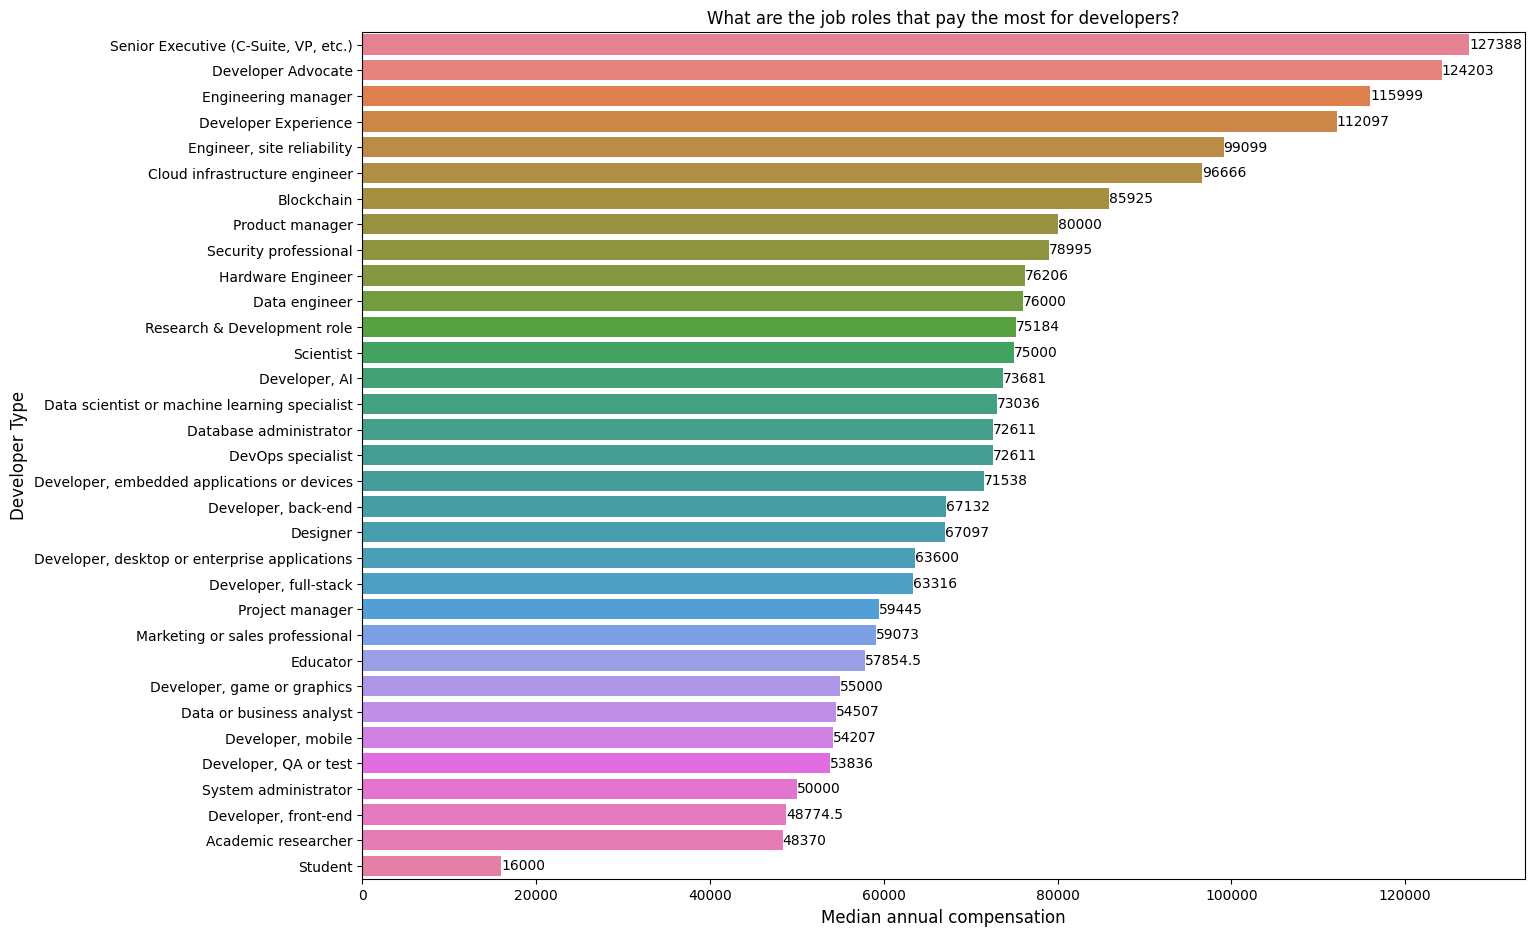

In [81]:
fix, ax = plt.subplots(figsize=(15,11));
sns.barplot(data=grouped_df, x='ConvertedCompYearly', y='DevType', hue='DevType');
for i in ax.containers:
    ax.bar_label(i,);
plt.xlabel('Median annual compensation', fontsize=12);
plt.ylabel('Developer Type', fontsize=12);
plt.title('What are the job roles that pay the most for developers?');

#### 3.3 AI
- Artificial intelligence is a technology that allows you to generate, classify, and perform tasks like image analysis and speech recognition.
- We learn more about the true feelings underlying the recent spike in interest in AI in this segment. Is it just hype, or is it actually changing how developers work?

##### 3.3.1 Sentiment and usage

- Using AI techniques during the development process.

In [82]:
aiselect_clean_df = survey_raw_df.AISelect.dropna().value_counts()
aiselect_clean_df

AISelect
Yes                        37662
No, and I don't plan to    14837
No, but I plan to soon      8408
Name: count, dtype: int64

In [83]:
fig, ax = plt.subplots(figsize=(16,2));
plt.barh(aiselect_clean_df.sort_values().index, aiselect_clean_df.sort_values().values, height=0.8);
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x*100 / aiselect_clean_df.values.sum() : 0.2f}%');
ax.set_xticks([]);
plt.xlabel('Percentage of AI users', fontsize=14);
plt.ylabel('Respondents', fontsize=14);
plt.title('Do you currently use AI tools in your development process?', fontsize=14);

- This year, 76%(61.84%+13.80%) of all respondents said they are utilizing or intend to employ AI technologies in their development process.

- sentiment analysis AI tool

In [84]:
aisent_clean_df = survey_raw_df.AISent.dropna().value_counts()
aisent_clean_df

AISent
Favorable           22167
Very favorable      10848
Indifferent          8564
Unfavorable          2381
Unsure               1357
Very unfavorable      556
Name: count, dtype: int64

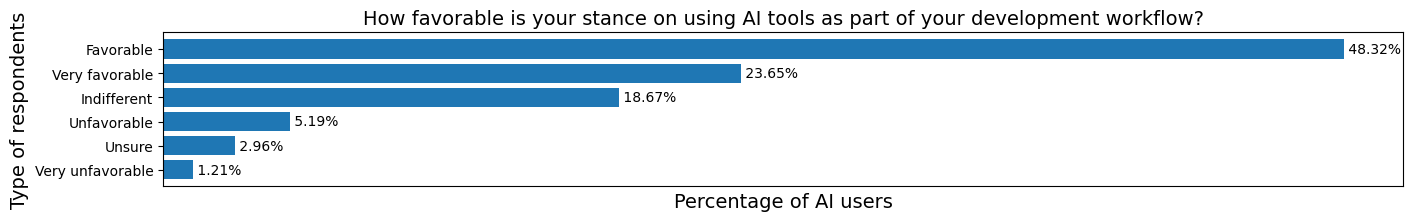

In [85]:
fig, ax = plt.subplots(figsize=(16,2));
plt.barh(aisent_clean_df.sort_values().index, aisent_clean_df.sort_values().values, height=0.8);
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x*100 / aisent_clean_df.values.sum() : 0.2f}%');
ax.set_xticks([]);
plt.xlabel('Percentage of AI users', fontsize=14);
plt.ylabel('Type of respondents', fontsize=14);
plt.title('How favorable is your stance on using AI tools as part of your development workflow?', fontsize=14);

- 72%(48.32%+23.65%) of all respondents think AI tools for development are good or very good.

##### 3.3.2 Developer tools

- Benefits of AI tools

In [86]:
aiben_clean_df = split_multi_ans_column(survey_raw_df.AIBen).sum()
aiben_clean_df

Increase productivity            29892
Greater efficiency               21586
Improve collaboration             2867
Speed up learning                23022
Improve accuracy in coding       11165
Make workload more manageable     9234
Other (please specify):           1839
dtype: int64

In [87]:
fig, ax = plt.subplots(figsize=(16,4));
plt.barh(aiben_clean_df.sort_values().index, aiben_clean_df.sort_values().values, height=0.8);
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x*100 / aiben_clean_df.values.sum() : 0.2f}%');
ax.set_xticks([]);
plt.xlabel('Percentage of AI users', fontsize=14);
plt.ylabel('Type of respondents', fontsize=14);
plt.title('For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.', fontsize=14);

- 30% of developers concur that the main advantage of AI technologies is increased productivity.

- Accuracy of AI tools

In [88]:
aiacc_clean_df = survey_raw_df.AIAcc.dropna().value_counts()
aiacc_clean_df

AIAcc
Somewhat trust                15039
Neither trust nor distrust     9920
Somewhat distrust              8395
Highly distrust                2932
Highly trust                   1016
Name: count, dtype: int64

In [89]:
aiacc_prof_clean_df = survey_raw_df[survey_raw_df['MainBranch'] == 'I am a developer by profession'].AIAcc.dropna().value_counts()
aiacc_prof_clean_df

AIAcc
Somewhat trust                11512
Neither trust nor distrust     8006
Somewhat distrust              6769
Highly distrust                2432
Highly trust                    660
Name: count, dtype: int64

In [90]:
aiacc_learn_clean_df = survey_raw_df[survey_raw_df['MainBranch'] == 'I am learning to code'].AIAcc.dropna().value_counts()
aiacc_learn_clean_df

AIAcc
Somewhat trust                1094
Neither trust nor distrust     548
Somewhat distrust              357
Highly trust                   130
Highly distrust                100
Name: count, dtype: int64

In [91]:
fig, ax = plt.subplots(3,1, figsize=(16,8));
fig.text(0.5, 0.00, 'Kind of AI users', ha='center',fontsize=14);
fig.text(0.00, 0.5, 'Type of respondents', va='center', rotation='vertical', fontsize=14);
fig.subplots_adjust(hspace=1.0)

ax1= plt.subplot(3,1,1)
plt.barh(aiacc_clean_df.sort_values().index, aiacc_clean_df.sort_values().values, height=0.8);
ax1.bar_label(ax1.containers[0], fmt=lambda x : f'{x*100 / aiacc_clean_df.values.sum() : 0.2f}%');
ax1.set_xticks([]);
plt.xlabel('Percentage of All AI users', fontsize=14);

ax2= plt.subplot(3,1,2)
plt.barh(aiacc_learn_clean_df.sort_values().index, aiacc_learn_clean_df.sort_values().values, height=0.8);
ax2.bar_label(ax2.containers[0], fmt=lambda x : f'{x*100 / aiacc_learn_clean_df.values.sum() : 0.2f}%');
ax2.set_xticks([]);
plt.xlabel('Percentage of AI users by Professional Developers', fontsize=14);

ax3= plt.subplot(3,1,3)
plt.barh(aiacc_prof_clean_df.sort_values().index, aiacc_prof_clean_df.sort_values().values, height=0.8);
ax3.bar_label(ax3.containers[0], fmt=lambda x : f'{x*100 / aiacc_prof_clean_df.values.sum() : 0.2f}%');
ax3.set_xticks([]);
plt.xlabel('Percentage of AI users by Learning to Code', fontsize=14);

plt.tight_layout(pad=2.5);
plt.suptitle('How much do you trust the accuracy of the output from AI tools as part of your development workflow?', fontsize=14);

- Regarding AI accuracy, 43%(40.32%+2.72%) are confident while 31%(22.51%+7.86%) are dubious. Prefessional developers and code learners have also high feith on AI.

- AI tools next year
    - In next year how AI will integrete with our works? Let's see.

In [92]:
Much_more_integrated = split_multi_ans_column(survey_raw_df['AINextMuch more integrated']).sum()
Much_more_integrated

Learning about a codebase               2619
Project planning                         975
Writing code                            6868
Documenting code                        4567
Debugging and getting help              5273
Deployment and monitoring                399
Search for answers                      7397
Generating content or synthetic data    4064
Testing code                            2865
Committing and reviewing code           1271
Predictive analytics                     523
Other (please specify):                   40
dtype: int64

In [93]:
No_change = split_multi_ans_column(survey_raw_df['AINextNo change']).sum()
No_change

Writing code                            5434
Debugging and getting help              3580
Search for answers                      4237
Documenting code                        2077
Learning about a codebase               1988
Generating content or synthetic data    2538
Project planning                         934
Committing and reviewing code            859
Predictive analytics                     353
Testing code                            1418
Deployment and monitoring                310
Other (please specify):                   48
dtype: int64

In [94]:
More_integrated = split_multi_ans_column(survey_raw_df['AINextMore integrated']).sum()
More_integrated

Writing code                            14802
Debugging and getting help               9942
Search for answers                      10805
Learning about a codebase                5161
Documenting code                         6680
Testing code                             4615
Generating content or synthetic data     4907
Committing and reviewing code            1995
Deployment and monitoring                 559
Project planning                         1837
Predictive analytics                      705
Other (please specify):                    49
dtype: int64

In [95]:
Less_integrated = split_multi_ans_column(survey_raw_df['AINextLess integrated']).sum()
Less_integrated

Debugging and getting help              517
Search for answers                      493
Writing code                            932
Testing code                            238
Generating content or synthetic data    270
Learning about a codebase               429
Committing and reviewing code           171
Deployment and monitoring                99
Documenting code                        298
Project planning                        198
Predictive analytics                     77
Other (please specify):                  10
dtype: int64

In [96]:
Much_less_integrated = split_multi_ans_column(survey_raw_df['AINextMuch less integrated']).sum()
Much_less_integrated

Writing code                            607
Generating content or synthetic data    268
Learning about a codebase               371
Debugging and getting help              359
Committing and reviewing code           179
Search for answers                      434
Documenting code                        291
Testing code                            230
Project planning                        182
Predictive analytics                     92
Deployment and monitoring                99
Other (please specify):                  16
dtype: int64

In [97]:
all = pd.concat([Much_more_integrated, More_integrated, No_change, Less_integrated, Much_less_integrated], axis=1)
all.columns = ['Much_more_integrated','More_integrated','No_change','Less_integrated','Much_less_integrated']
all

Much_more_integrated  More_integrated  \
Learning about a codebase                             2619             5161   
Project planning                                       975             1837   
Writing code                                          6868            14802   
Documenting code                                      4567             6680   
Debugging and getting help                            5273             9942   
Deployment and monitoring                              399              559   
Search for answers                                    7397            10805   
Generating content or synthetic data                  4064             4907   
Testing code                                          2865             4615   
Committing and reviewing code                         1271             1995   
Predictive analytics                                   523              705   
Other (please specify):                                 40               49   

                                      No_change  Less_integrated  \
Learning about a codebase                  1988              429   
Project planning                            934              198   
Writing code                               5434              932   
Documenting code                           2077              298   
Debugging and getting help                 3580              517   
Deployment and monitoring                   310               99   
Search for answers                         4237              493   
Generating content or synthetic data       2538              270   
Testing code                               1418              238   
Committing and reviewing code               859              171   
Predictive analytics                        353               77   
Other (please specify):                      48               10   

                                      Much_less_integrated  
Learning about a codebase                              371  
Project planning                                       182  
Writing code                                           607  
Documenting code                                       291  
Debugging and getting help                             359  
Deployment and monitoring                               99  
Search for answers                                     434  
Generating content or synthetic data                   268  
Testing code                                           230  
Committing and reviewing code                          179  
Predictive analytics                                    92  
Other (please specify):                                 16

In [98]:
all_pct = all.div(all.sum(axis=1), axis=0)*100
all_pct

Much_more_integrated  More_integrated  \
Learning about a codebase                        24.782362        48.836109   
Project planning                                 23.630635        44.522540   
Writing code                                     23.977935        51.677548   
Documenting code                                 32.825415        48.012650   
Debugging and getting help                       26.805958        50.541406   
Deployment and monitoring                        27.216917        38.130969   
Search for answers                               31.657109        46.242403   
Generating content or synthetic data             33.734540        40.732132   
Testing code                                     30.589366        49.273970   
Committing and reviewing code                    28.402235        44.581006   
Predictive analytics                             29.885714        40.285714   
Other (please specify):                          24.539877        30.061350   

                                      No_change  Less_integrated  \
Learning about a codebase             18.811506         4.059425   
Project planning                      22.636937         4.798837   
Writing code                          18.971476         3.253849   
Documenting code                      14.928484         2.141882   
Debugging and getting help            18.199380         2.628234   
Deployment and monitoring             21.145975         6.753070   
Search for answers                    18.133185         2.109903   
Generating content or synthetic data  21.067486         2.241222   
Testing code                          15.139868         2.541106   
Committing and reviewing code         19.195531         3.821229   
Predictive analytics                  20.171429         4.400000   
Other (please specify):               29.447853         6.134969   

                                      Much_less_integrated  
Learning about a codebase                         3.510598  
Project planning                                  4.411052  
Writing code                                      2.119191  
Documenting code                                  2.091569  
Debugging and getting help                        1.825022  
Deployment and monitoring                         6.753070  
Search for answers                                1.857400  
Generating content or synthetic data              2.224620  
Testing code                                      2.455691  
Committing and reviewing code                     4.000000  
Predictive analytics                              5.257143  
Other (please specify):                           9.815951

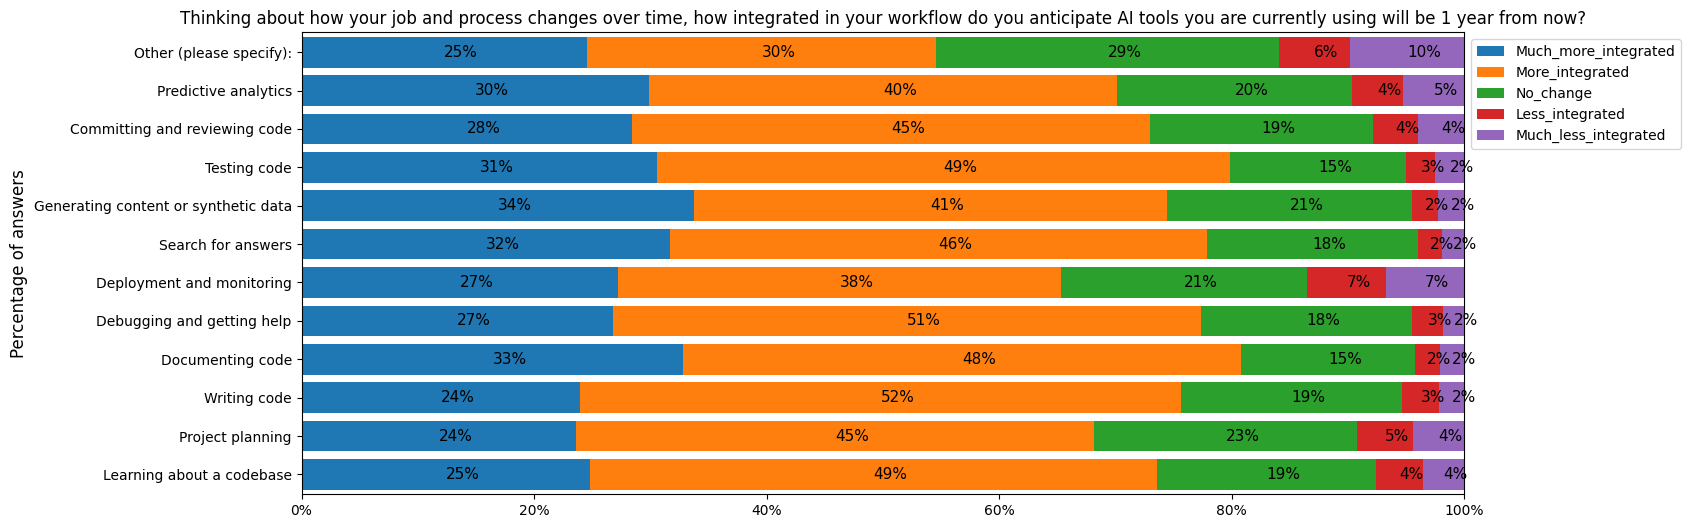

In [99]:
# Setup figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
ax.margins(x=20, y=0.01);

# Add bars
ax.barh(all_pct.index, all_pct["Much_more_integrated"], label="Much_more_integrated")
ax.barh(all_pct.index, all_pct.More_integrated, left=all_pct.Much_more_integrated, label="More_integrated")
ax.barh(all_pct.index, all_pct["No_change"], left=all_pct["Much_more_integrated"] + all_pct["More_integrated"], label="No_change")
ax.barh(all_pct.index, all_pct["Less_integrated"], left=all_pct["Much_more_integrated"] + all_pct["More_integrated"] + all_pct["No_change"], label="Less_integrated")
ax.barh(all_pct.index, all_pct["Much_less_integrated"], left=all_pct["Much_more_integrated"] + all_pct["More_integrated"] + all_pct["No_change"] + all_pct["Less_integrated"], label="Much_less_integrated")

# Add percentages as labels
for idx, row in all_pct.iterrows():
    start = 0
    for col in all_pct.columns:
        y = all_pct.loc[idx, col]
        ax.text(
            x=start + y / 2,
            y=idx,
            s=f'{round(y)}%',
            fontsize=11,
            va="center",
            color="black",
            weight=20
        )
        start = start + y

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0, decimals=0))

ax.set_xlim(0, 100);
plt.legend(all_pct, bbox_to_anchor=(1,1));
plt.ylabel('Percentage of answers', fontsize=12);
plt.title('Thinking about how your job and process changes over time, how integrated in your workflow do you anticipate AI tools you are currently using will be 1 year from now?');

- The majority of developers concur that AI tools will become increasingly integrated over the course of the next year, namely in the areas of writing code (76%), testing code (80%), and documenting code (81%).

##### 3.3.3 Efficacy and Ethics

- Could AI technologies endanger your employment?

In [100]:
aithreat_df = survey_raw_df.AIThreat.dropna().value_counts()

In [101]:
fig, ax = plt.subplots(figsize=(8,1));
ax.margins(x=0.11, y=0);

aithreat_bar = plt.barh(aithreat_df.index, aithreat_df.values);
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x / aithreat_df.values.sum() * 100 : 0.2f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Responses');
plt.ylabel('Kind of Responses');
plt.title('Do you believe AI is a threat to your current job?');

- Approximately 68% of those surveyed don't think AI poses a threat.

- Let's see challenges with AI at wrok place.

In [102]:
aichallenges_df = split_multi_ans_column(survey_raw_df.AIChallenges.dropna()).sum()
aichallenges_df

Don’t trust the output or answers                                                      24450
AI tools lack context of codebase,  internal architecture, and/or company knowledge    23225
Lack of proper training and education on new tools                                     11843
Lack of executive buy-in                                                                4333
Not everyone uses them                                                                  9450
We don’t have the right policies in place to reduce security risks                     12192
Other (please specify):                                                                 2347
They create more work (more code/PRs to review, etc.)                                   5175
dtype: int64

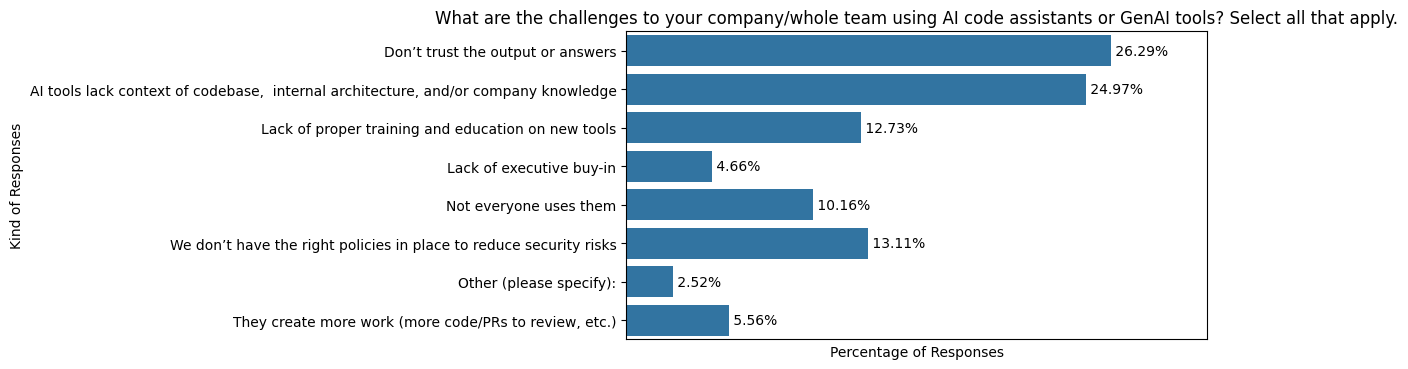

In [103]:
fig, ax = plt.subplots(figsize=(7.5,4));
ax.margins(x=0.2, y=0.02);

sns.barplot(y=aichallenges_df.index, x=aichallenges_df.values);
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x / aichallenges_df.values.sum() * 100 : 0.2f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Responses');
plt.ylabel('Kind of Responses');
plt.title('What are the challenges to your company/whole team using AI code assistants or GenAI tools? Select all that apply.');

- All respondents admit that the problem is not human error: compared to adequate training, twice as many experts see a lack of trust or comprehension of the codebase as the biggest obstacle to using AI solutions.

#### 3.4 Work
- Developers provides information about workplace trends as well as some transparency on pay rates for various roles and levels of experience.

##### 3.4.1 Employment

- Let's find the employment status of the respondents.

In [104]:
employment_df =  split_multi_ans_column(survey_raw_df.Employment.dropna()).sum().rename_axis('types').reset_index(name='cnts')
employment_df

types   cnts
0                                Employed, full-time  45162
1                                 Student, full-time   8626
2                 Not employed, but looking for work   3954
3  Independent contractor, freelancer, or self-em...  10726
4             Not employed, and not looking for work   1203
5                                 Student, part-time   2656
6                                Employed, part-time   4145
7                                I prefer not to say    546
8                                            Retired    681

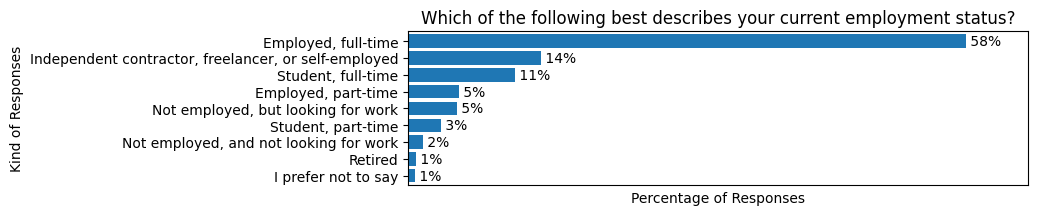

In [105]:
fig, ax = plt.subplots(figsize=(8,2));
ax.margins(x=0.11, y=0.02);

employment_bar = plt.barh(employment_df.sort_values(by='cnts').types, employment_df.cnts.sort_values());
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x / employment_df.cnts.sum() * 100 : 0.0f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Responses');
plt.ylabel('Kind of Responses');
plt.title('Which of the following best describes your current employment status?');

- 83% of those surveyed are employed full-time, part-time, or freelance.

- Those that are working, let's find out what their job situation is.


In [106]:
remotework_df = survey_raw_df.RemoteWork.dropna().value_counts()
remotework_df

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

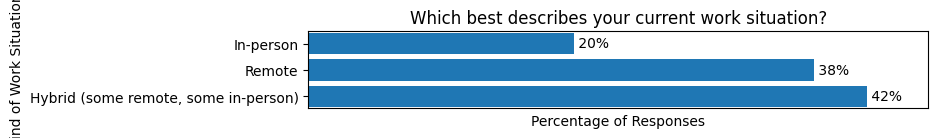

In [107]:
fig, ax = plt.subplots(figsize=(8,1));
ax.margins(x=0.11, y=0.02);

employment_bar = plt.barh(remotework_df.index, remotework_df.values);
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x / remotework_df.values.sum() * 100 : 0.0f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Responses');
plt.ylabel('Kind of Work Situation');
plt.title('Which best describes your current work situation?');

- The largest percentage of developers (42%) are hybrid, while the lowest percentage work in-person. Thus, we might conclude that the mixed work environment gained popularity following the COVID-19 epidemic.

##### 3.4.2 Company info

- How many individuals work for the firm or group on average? The principal firm alone should be included here, not the parent company or the holding company as a whole, if applicable.

In [108]:
orgsize_df = survey_raw_df.OrgSize.dropna().value_counts().sort_values().rename_axis('sizes').reset_index(name='counts')
orgsize_df.rename(index={0:9, 1:7, 2:0, 3:5, 4:2, 5:1, 6:6, 7:8, 8:4, 9:3}, inplace=True)
orgsize_df.sort_index(inplace=True)
orgsize_df

sizes  counts
0  Just me - I am a freelancer, sole proprietor, ...    3086
1                                   2 to 9 employees    4833
2                                 10 to 19 employees    4084
3                                 20 to 99 employees    9754
4                               100 to 499 employees    8694
5                               500 to 999 employees    3183
6                           1,000 to 4,999 employees    5353
7                           5,000 to 9,999 employees    1867
8                           10,000 or more employees    5558
9                                       I don’t know    1068

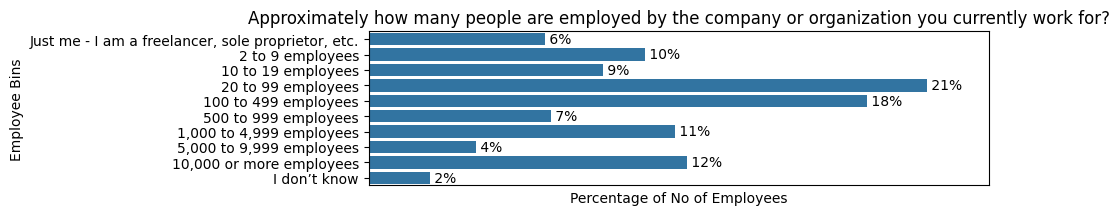

In [109]:
fig, ax = plt.subplots(figsize=(8,2));
ax.margins(x=0.11, y=0.1);

#employment_bar = plt.barh(orgsize_df.index, orgsize_df.values);
ax = sns.barplot(data=orgsize_df, y=orgsize_df.sizes, x=orgsize_df.counts);
ax.bar_label(ax.containers[0], fmt=lambda x : f'{x / orgsize_df.counts.sum() * 100 : 0.0f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of No of Employees');
plt.ylabel('Employee Bins');
plt.title('Approximately how many people are employed by the company or organization you currently work for?');

- surprisingly less than 100 people are employed by the companies where 47% of responders work.

##### 3.4.3 Salary

- Let's find the employees' current total yearly remuneration, which includes their salaries, bonuses, and benefits before taxes and deductions.

In [110]:
# Remove rows with missing values in 'DevType' column from the data
devtype_cleaned_df = survey_raw_df.dropna(subset=['DevType'])
# Remove rows with missing values in 'ConvertedCompYearly' column from the data
convcomp_devtype_cleaned_df = devtype_cleaned_df.dropna(subset=['ConvertedCompYearly'])

In [111]:
# Check if 'Others, (please specify)' was recorded as a response
print(convcomp_devtype_cleaned_df['DevType'].unique())

['Data scientist or machine learning specialist' 'Academic researcher'
 'Developer, back-end' 'Student' 'Engineering manager'
 'Other (please specify):' 'Developer, full-stack' 'Developer, front-end'
 'Developer, embedded applications or devices'
 'Engineer, site reliability' 'Developer, mobile'
 'Developer, game or graphics' 'Senior Executive (C-Suite, VP, etc.)'
 'Developer, QA or test' 'Data or business analyst' 'System administrator'
 'Cloud infrastructure engineer'
 'Developer, desktop or enterprise applications'
 'Research & Development role' 'Security professional' 'DevOps specialist'
 'Developer Experience' 'Project manager' 'Blockchain' 'Developer, AI'
 'Educator' 'Product manager' 'Scientist' 'Hardware Engineer'
 'Data engineer' 'Designer' 'Developer Advocate' 'Database administrator'
 'Marketing or sales professional']


- Because the responses were only recorded as "Other (please specify):" in the dataset instead of specifying the job roles entered into the blank box of the survey, we will omit the responses with "Other (please specify):". Visualising the median compensation of this unspecific category of job roles may be ambiguous and carry lesser meaning for our analysis.

In [112]:
# Remove rows that contain 'Other (please specify):' using Boolean masking 
mask = convcomp_devtype_cleaned_df['DevType'] != 'Other (please specify):'
convcomp_devtype_cleaned_df_final = convcomp_devtype_cleaned_df[mask]
convcomp_devtype_cleaned_df_final

ResponseId                                         MainBranch  \
72             73                     I am a developer by profession   
374           375  I am not primarily a developer, but I write co...   
379           380                     I am a developer by profession   
385           386                     I am a developer by profession   
389           390                     I am a developer by profession   
...           ...                                                ...   
41180       41181                     I am a developer by profession   
41184       41185                     I am a developer by profession   
41185       41186                     I am a developer by profession   
41186       41187                     I am a developer by profession   
41187       41188                     I am a developer by profession   

                   Age                                         Employment  \
72     18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374    25-34 years old                                Employed, full-time   
379    35-44 years old                                Employed, full-time   
385    35-44 years old  Independent contractor, freelancer, or self-em...   
389    25-34 years old             Employed, full-time;Student, part-time   
...                ...                                                ...   
41180  25-34 years old                                Employed, full-time   
41184  45-54 years old                                Employed, full-time   
41185  35-44 years old                                Employed, full-time   
41186  18-24 years old             Student, full-time;Employed, part-time   
41187  55-64 years old  Employed, full-time;Independent contractor, fr...   

                                 RemoteWork   Check  \
72     Hybrid (some remote, some in-person)  Apples   
374    Hybrid (some remote, some in-person)  Apples   
379                                  Remote  Apples   
385                                  Remote  Apples   
389                                  Remote  Apples   
...                                     ...     ...   
41180                             In-person  Apples   
41184  Hybrid (some remote, some in-person)  Apples   
41185                                Remote  Apples   
41186  Hybrid (some remote, some in-person)  Apples   
41187  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities  \
72     Hobby;School or academic work;Professional dev...   
374    Hobby;School or academic work;Professional dev...   
379                       Hobby;Bootstrapping a business   
385                                                Hobby   
389                        Hobby;School or academic work   
...                                                  ...   
41180                                              Hobby   
41184  Hobby;Contribute to open-source projects;Freel...   
41185                      Hobby;Other (please specify):   
41186  Hobby;School or academic work;Professional dev...   
41187  Hobby;Contribute to open-source projects;Boots...   

                                                 EdLevel  \
72     Secondary school (e.g. American high school, G...   
374       Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
379      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
385      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
389    Some college/university study without earning ...   
...                                                  ...   
41180    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41184    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41185       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
41186  Some college/university study without earning ...   
41187                                     Something else   

                                               LearnCode  \
72     On the job training;Other online resources (e..

In [113]:
convcomp_devtype_grouped_df = convcomp_devtype_cleaned_df_final.groupby(['DevType'])['ConvertedCompYearly'].median().sort_values(ascending=False).reset_index()
convcomp_devtype_grouped_df

DevType  ConvertedCompYearly
0            Senior Executive (C-Suite, VP, etc.)             127388.0
1                              Developer Advocate             124203.0
2                             Engineering manager             115999.0
3                            Developer Experience             112097.0
4                      Engineer, site reliability              99099.0
5                   Cloud infrastructure engineer              96666.0
6                                      Blockchain              85925.0
7                                 Product manager              80000.0
8                           Security professional              78995.0
9                               Hardware Engineer              76206.0
10                                  Data engineer              76000.0
11                    Research & Development role              75184.0
12                                      Scientist              75000.0
13                                  Developer, AI              73681.0
14  Data scientist or machine learning specialist              73036.0
15                         Database administrator              72611.0
16                              DevOps specialist              72611.0
17    Developer, embedded applications or devices              71538.0
18                            Developer, back-end              67132.0
19                                       Designer              67097.0
20  Developer, desktop or enterprise applications              63600.0
21                          Developer, full-stack              63316.0
22                                Project manager              59445.0
23                Marketing or sales professional              59073.0
24                                       Educator              57854.5
25                    Developer, game or graphics              55000.0
26                       Data or business analyst              54507.0
27                              Developer, mobile              54207.0
28                          Developer, QA or test              53836.0
29                           System administrator              50000.0
30                           Developer, front-end              48774.5
31                            Academic researcher              48370.0
32                                        Student              16000.0

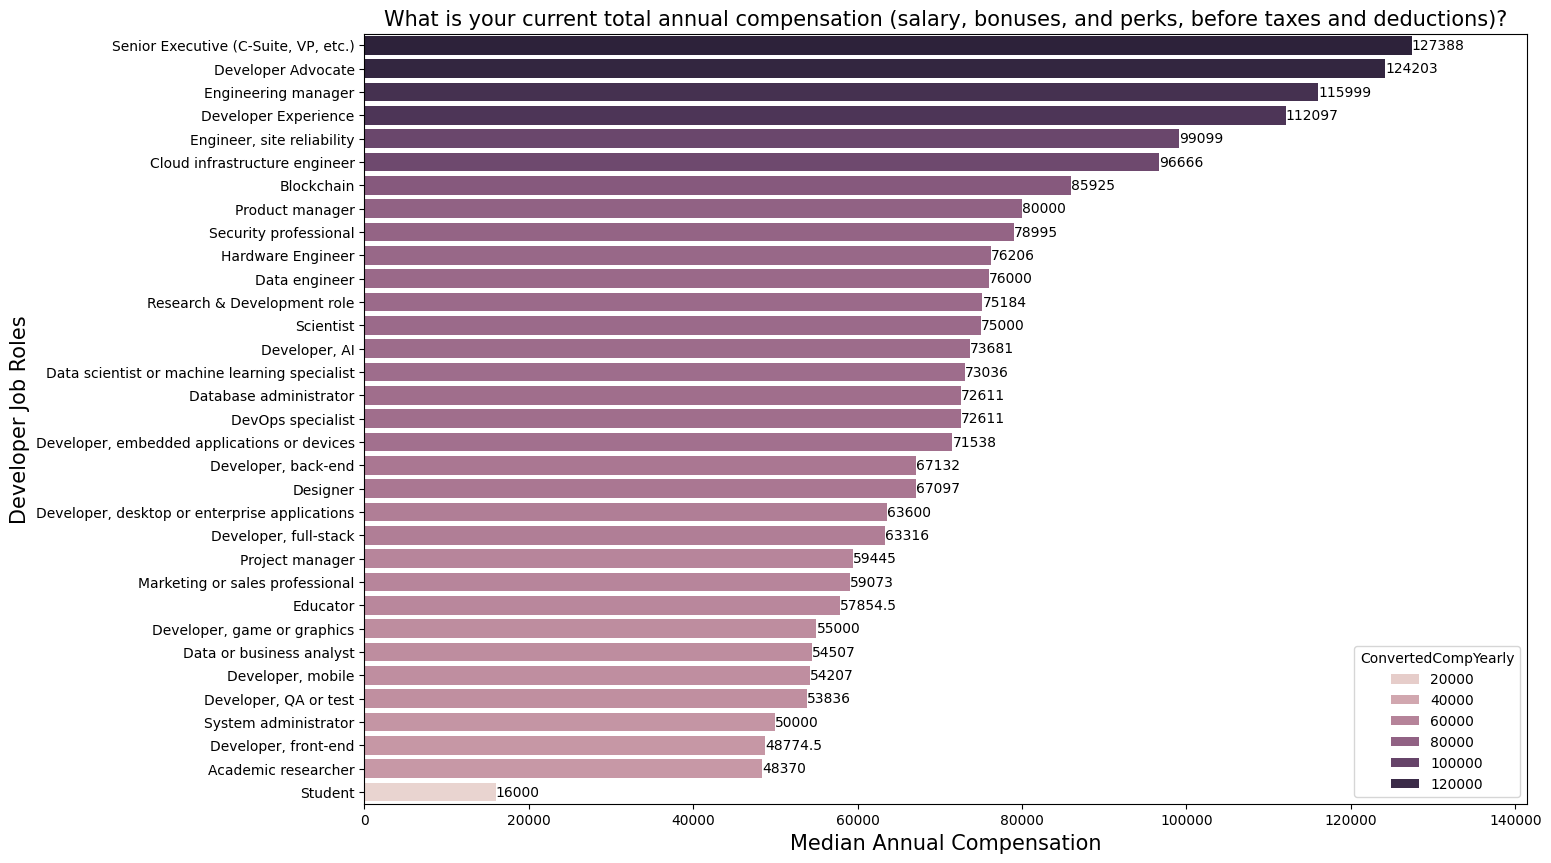

In [114]:
fig, ax = plt.subplots(figsize=(15,10));
ax.margins(x=0.11, y=0.2);

bars = sns.barplot(convcomp_devtype_grouped_df, y=convcomp_devtype_grouped_df.DevType, x=convcomp_devtype_grouped_df.ConvertedCompYearly, hue=convcomp_devtype_grouped_df.ConvertedCompYearly);
for i in bars.containers:
    bars.bar_label(i,)

bars.set_xlabel('Median Annual Compensation', fontsize=15);
bars.set_ylabel('Developer Job Roles', fontsize=15);
plt.title('What is your current total annual compensation (salary, bonuses, and perks, before taxes and deductions)?', fontsize=15);

- Due to their critical responsibilities in maintaining the uptime of digital services, site reliability and cloud infrastructure engineers received the highest salaries among all respondents.

- Let's examine the relationship between salary and experience.

In [115]:
# Remove rows with missing values in 'YearsCode_int' column from the data
convcomp_devtype_cleaned_years_df = convcomp_devtype_cleaned_df_final.dropna(subset=['YearsCode_int'])
convcomp_devtype_cleaned_years_df

ResponseId                                         MainBranch  \
72             73                     I am a developer by profession   
374           375  I am not primarily a developer, but I write co...   
379           380                     I am a developer by profession   
385           386                     I am a developer by profession   
389           390                     I am a developer by profession   
...           ...                                                ...   
41180       41181                     I am a developer by profession   
41184       41185                     I am a developer by profession   
41185       41186                     I am a developer by profession   
41186       41187                     I am a developer by profession   
41187       41188                     I am a developer by profession   

                   Age                                         Employment  \
72     18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374    25-34 years old                                Employed, full-time   
379    35-44 years old                                Employed, full-time   
385    35-44 years old  Independent contractor, freelancer, or self-em...   
389    25-34 years old             Employed, full-time;Student, part-time   
...                ...                                                ...   
41180  25-34 years old                                Employed, full-time   
41184  45-54 years old                                Employed, full-time   
41185  35-44 years old                                Employed, full-time   
41186  18-24 years old             Student, full-time;Employed, part-time   
41187  55-64 years old  Employed, full-time;Independent contractor, fr...   

                                 RemoteWork   Check  \
72     Hybrid (some remote, some in-person)  Apples   
374    Hybrid (some remote, some in-person)  Apples   
379                                  Remote  Apples   
385                                  Remote  Apples   
389                                  Remote  Apples   
...                                     ...     ...   
41180                             In-person  Apples   
41184  Hybrid (some remote, some in-person)  Apples   
41185                                Remote  Apples   
41186  Hybrid (some remote, some in-person)  Apples   
41187  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities  \
72     Hobby;School or academic work;Professional dev...   
374    Hobby;School or academic work;Professional dev...   
379                       Hobby;Bootstrapping a business   
385                                                Hobby   
389                        Hobby;School or academic work   
...                                                  ...   
41180                                              Hobby   
41184  Hobby;Contribute to open-source projects;Freel...   
41185                      Hobby;Other (please specify):   
41186  Hobby;School or academic work;Professional dev...   
41187  Hobby;Contribute to open-source projects;Boots...   

                                                 EdLevel  \
72     Secondary school (e.g. American high school, G...   
374       Professional degree (JD, MD, Ph.D, Ed.D, etc.)   
379      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
385      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
389    Some college/university study without earning ...   
...                                                  ...   
41180    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41184    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41185       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
41186  Some college/university study without earning ...   
41187                                     Something else   

                                               LearnCode  \
72     On the job training;Other online resources (e..

In [116]:
convcomp_devtype_grouped_conv_year_df = convcomp_devtype_cleaned_years_df.groupby(['DevType'])[['ConvertedCompYearly', 'YearsCode_int']].mean().reset_index()
convcomp_devtype_grouped_conv_year_df

DevType  ConvertedCompYearly  \
0                             Academic researcher         58097.369620   
1                                      Blockchain        138237.626374   
2                   Cloud infrastructure engineer        120770.461538   
3                                   Data engineer         93667.809689   
4                        Data or business analyst         64509.487562   
5   Data scientist or machine learning specialist         98582.522936   
6                          Database administrator         89644.745763   
7                                        Designer         69784.954545   
8                               DevOps specialist         86454.456033   
9                              Developer Advocate        130927.865385   
10                           Developer Experience        162155.011364   
11                                  Developer, AI         95402.404145   
12                          Developer, QA or test         65682.763485   
13                            Developer, back-end         87460.739222   
14  Developer, desktop or enterprise applications         81817.555660   
15    Developer, embedded applications or devices         88084.762097   
16                           Developer, front-end         64827.178014   
17                          Developer, full-stack         76270.744928   
18                    Developer, game or graphics         76805.148325   
19                              Developer, mobile         80851.252734   
20                                       Educator         61125.990741   
21                     Engineer, site reliability        117476.240310   
22                            Engineering manager        139142.571165   
23                              Hardware Engineer        233049.261538   
24                Marketing or sales professional         80924.294118   
25                                Product manager         92582.988506   
26                                Project manager        212468.216667   
27                    Research & Development role         92175.381313   
28                                      Scientist         87637.239669   
29                          Security professional        104525.362832   
30           Senior Executive (C-Suite, VP, etc.)        230995.660131   
31                                        Student         25859.818841   
32                           System administrator         55239.565217   

    YearsCode_int  
0       15.164557  
1       13.362637  
2       15.972028  
3       14.304498  
4       10.731343  
5       13.220183  
6       17.576271  
7       15.454545  
8       15.104294  
9       21.076923  
10      17.193182  
11      13.031088  
12      12.008299  
13      14.867287  
14      18.360377  
15      17.057796  
16      11.222695  
17      14.694686  
18      14.277512  
19      13.243013  
20      19.462963  
21      15.968992  
22      20.447320  
23      13.153846  
24      11.705882  
25      19.275862  
26      18.625000  
27      17.906566  
28      15.983471  
29      15.690265  
30      22.928105  
31       7.572464  
32      15.521739

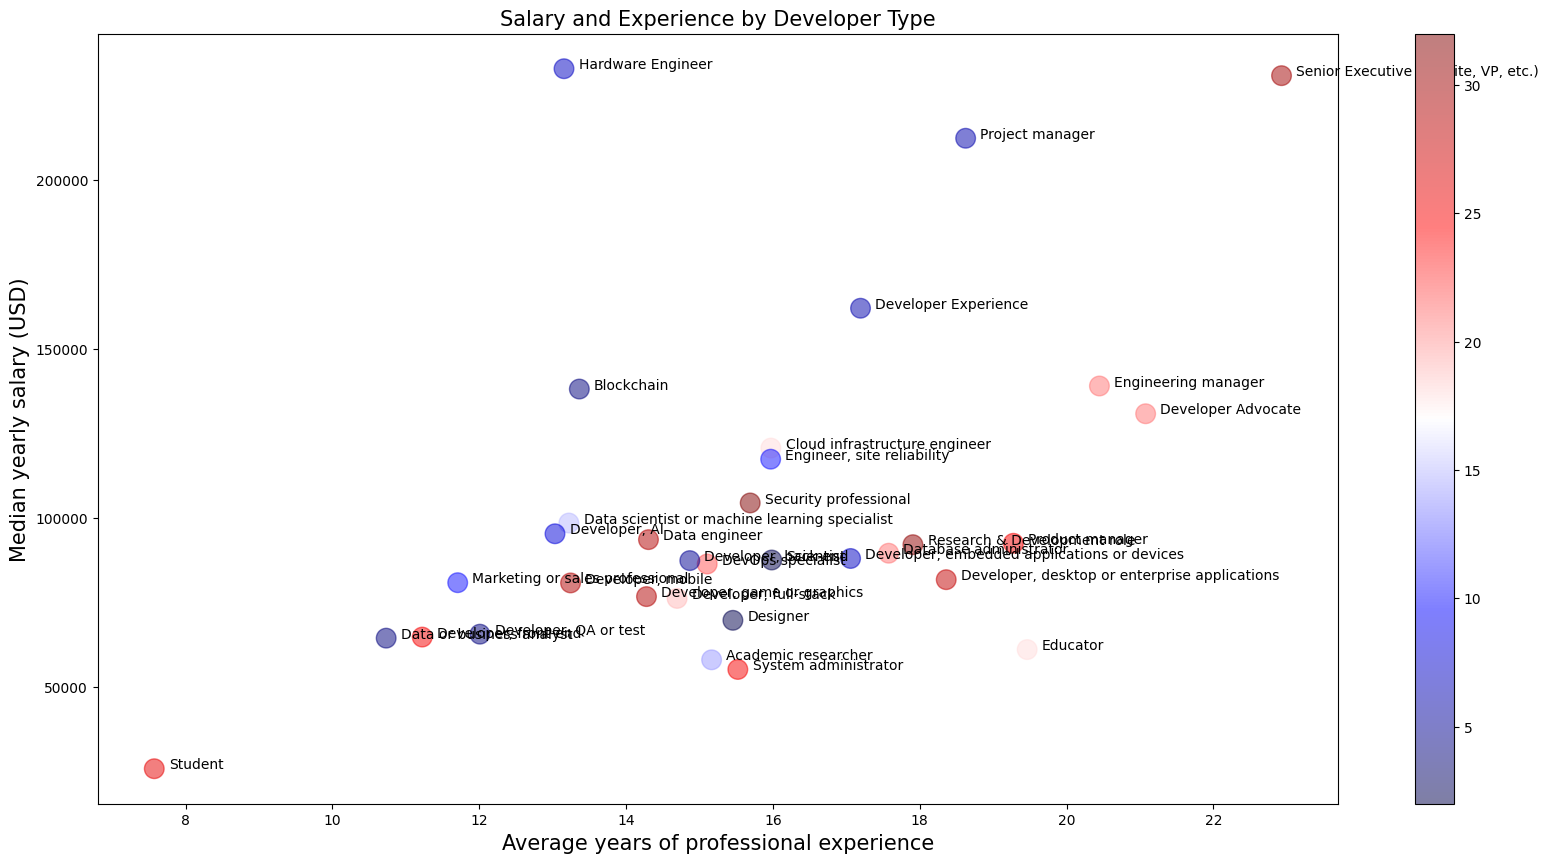

In [117]:
fig, ax = plt.subplots(figsize=(20,10));

x = convcomp_devtype_grouped_conv_year_df.YearsCode_int
y = convcomp_devtype_grouped_conv_year_df.ConvertedCompYearly
labels = convcomp_devtype_grouped_conv_year_df.DevType
colors = np.random.randint(convcomp_devtype_grouped_conv_year_df.shape[0], size=(convcomp_devtype_grouped_conv_year_df.shape[0]));

plt.scatter(x, y,c=colors, s=200, alpha=0.5, cmap='seismic');

for i, label in enumerate(labels):
    ax.text(x[i]+0.2, y[i], label);

plt.colorbar();

plt.xlabel('Average years of professional experience', size=15);
plt.ylabel('Median yearly salary (USD)', size=15);
plt.title('Salary and Experience by Developer Type', size=15);

- This year's top-earning professions related to the DevRel scaffolding demonstrate that familiarity with developers is highly desired.
- On average, senior executives with the greatest experience earn the highest salary, followed by engineering managers, developer experience specialists, and developer advocates.

##### 3.4.4 Purchasing technology

- To what extent can you directly influence the acquisition of new technologies at your company?

In [118]:
purchase_influence_df = survey_raw_df.PurchaseInfluence.dropna().value_counts()
purchase_influence_df

PurchaseInfluence
I have some influence               19197
I have little or no influence       17942
I have a great deal of influence    10267
Name: count, dtype: int64

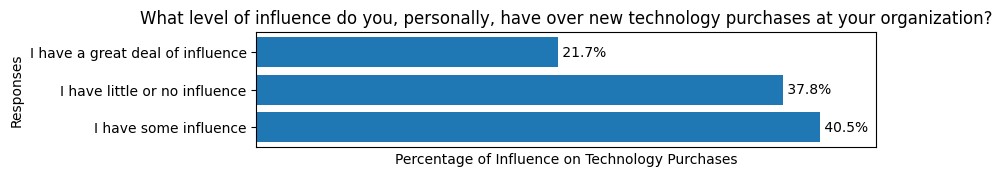

In [119]:
fig, ax = plt.subplots(figsize=(8,1.5));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(purchase_influence_df.index, purchase_influence_df.values);

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x * 100 / purchase_influence_df.values.sum() : 0.1f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Influence on Technology Purchases');
plt.ylabel('Responses');
plt.title('What level of influence do you, personally, have over new technology purchases at your organization?');

- So, the majority of responders (62%) have control over technology purchases. 

- Lets see how respondents find and investigate potential solutions before purchasing a new tool or piece of software.

In [120]:
buy_new_tool_df = split_multi_ans_column(survey_raw_df.BuyNewTool.dropna()).sum().rename_axis('response').reset_index(name='counts')
buy_new_tool_df

response  counts
0                                 Start a free trial   33961
1                    Ask developers I know/work with   32739
2                           Ask a generative AI tool    8484
3    Visit developer communities like Stack Overflow   27696
4  Read ratings or reviews on third party sites l...   14111
5  Research companies that have advertised on sit...    6246
6            Research companies that have emailed me    2236
7                            Other (please specify):    3183

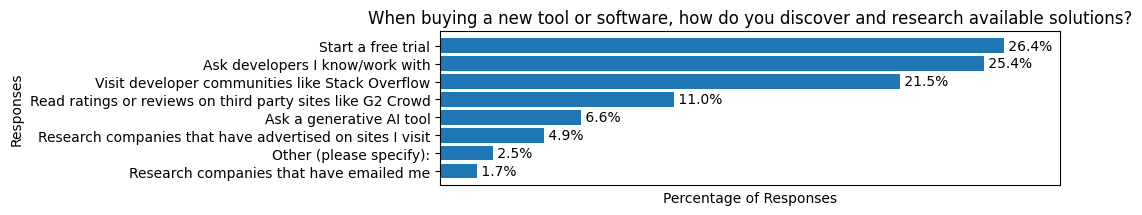

In [121]:
fig, ax = plt.subplots(figsize=(8,2));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(buy_new_tool_df.sort_values(by='counts').response, buy_new_tool_df.counts.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x * 100 / buy_new_tool_df.counts.sum() : 0.1f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Responses');
plt.ylabel('Responses');
plt.title('When buying a new tool or software, how do you discover and research available solutions?');

- The most popular method for assessing new tools is to launch a free trial (26%), closely followed by consulting other developers (25%).

- But when recommending a technological buy, what feature of the product do respondents care about the most.

In [122]:
tech_endorse_df = split_multi_ans_column(survey_raw_df.TechEndorse.dropna()).sum().rename_axis('response').reset_index(name='counts')
tech_endorse_df

response  counts
0                                   APIs   32827
1                          Customization   26150
2         Integrated developer community   17960
3                 Quality support system   17061
4                    AI tool integration    2574
5  Reputation for quality and excellence   31013
6           Frequent updates to features   17699
7    Connected to an open source project   18140
8                                 Other:    2117

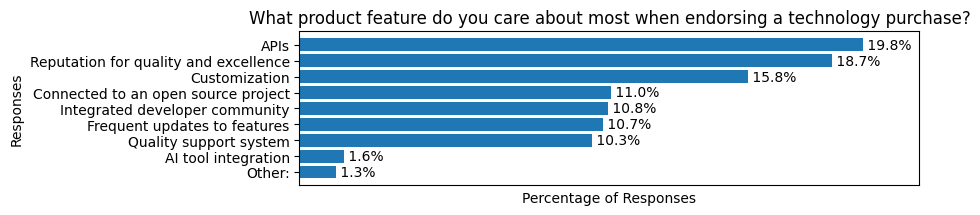

In [123]:
fig, ax = plt.subplots(figsize=(8,2));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(tech_endorse_df.sort_values(by='counts').response, tech_endorse_df.counts.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x * 100 / tech_endorse_df.counts.sum() : 0.1f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Responses');
plt.ylabel('Responses');
plt.title('What product feature do you care about most when endorsing a technology purchase?');

- Although APIs are wonderful, did you know that if you make your technology accessible to developers, 20% of them would be more inclined to recommend it? Notifying back-end engineers and engineering managers about your API integrations is important since they are even more likely than regular coders to recommend your product

##### 3.4.5 Coding outside of work

In [124]:
coding_activities_df = split_multi_ans_column(survey_raw_df.CodingActivities.dropna()).sum().rename_axis('response').reset_index(name='counts')
coding_activities_df['pct'] = round(coding_activities_df.counts * 100 / coding_activities_df.counts.sum(), 1)
coding_activities_df

response  counts   pct
0                                              Hobby   37226  35.2
1                 Contribute to open-source projects   13717  13.0
2                            Other (please specify):    1098   1.0
3                       I don’t code outside of work    6508   6.1
4                           Bootstrapping a business    8194   7.7
5                            School or academic work    7069   6.7
6  Professional development or self-paced learnin...   21513  20.3
7                            Freelance/contract work   10513   9.9

In [125]:
# Remove rows that contain 'Other (please specify):' using Boolean masking
mask1 = coding_activities_df.response != 'Other (please specify):'
coding_activities_df_final = coding_activities_df[mask1]
coding_activities_df_final

response  counts   pct
0                                              Hobby   37226  35.2
1                 Contribute to open-source projects   13717  13.0
3                       I don’t code outside of work    6508   6.1
4                           Bootstrapping a business    8194   7.7
5                            School or academic work    7069   6.7
6  Professional development or self-paced learnin...   21513  20.3
7                            Freelance/contract work   10513   9.9

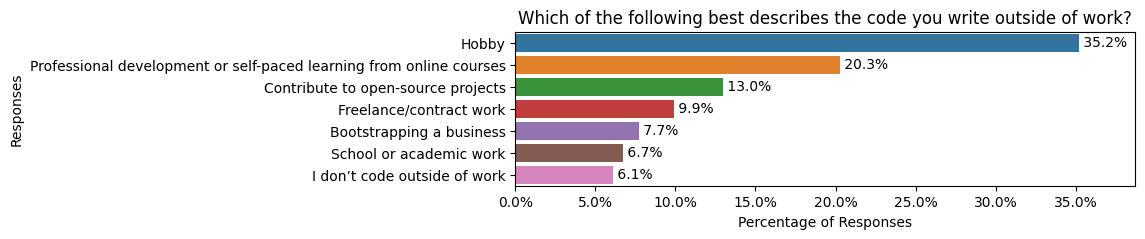

In [126]:
fig, ax = plt.subplots(figsize=(8,2));
ax.margins(x=0.1, y=0.05);

x_data=coding_activities_df_final.pct.sort_values(ascending=False)
y_data=coding_activities_df_final.sort_values(by='counts', ascending=False).response
bars = sns.barplot(data=coding_activities_df_final, y=y_data, x=x_data, hue=y_data);

for i in ax.containers:
    ax.bar_label(i, fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of Responses');
plt.ylabel('Responses');
plt.title('Which of the following best describes the code you write outside of work?');

- Nearly 42% of developers code outside of work for professional growth or self-paced online course learning, while the majority of developers (36%), code as a pastime.

#### 3.5 Professional Developers
- Professional developers were asked to describe what factors affect their productivity at work, how often they occur, and how much time they spend out of their day to complete them.
- They were also questioned about their experience working as developers and whether they had access to the procedures, equipment, and software required to make their jobs easier.

##### 3.5.1. Productivity Impacts

- Taking part in the Professional Developer series

In [127]:
tbranch_df = survey_raw_df.TBranch.dropna().value_counts().rename_axis('response').reset_index(name='counts')
tbranch_df

response  counts
0      Yes   29960
1       No   14517

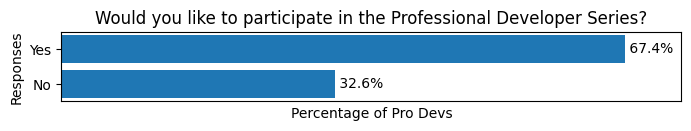

In [128]:
fig, ax = plt.subplots(figsize=(8,0.9));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(tbranch_df.sort_values(by='counts').response, tbranch_df.counts.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x * 100 / tbranch_df.counts.sum() : 0.1f}%');

ax.set_xticks([]);
plt.xlabel('Percentage of Pro Devs');
plt.ylabel('Responses');
plt.title('Would you like to participate in the Professional Developer Series?');

- This year's Professional Developer segment of the Developer Survey, which focused on work satisfaction and productivity, received responses from roughly 29K professional developers.

- Lets see if they are a lone worker or manager of individuals

In [129]:
icorpm_df = survey_raw_df.ICorPM.dropna().value_counts().rename_axis('response').reset_index(name='counts')
icorpm_df['pct'] = round(icorpm_df.counts * 100 / icorpm_df.counts.sum(), 1)
icorpm_df

response  counts   pct
0  Individual contributor   25888  86.9
1          People manager    3913  13.1

In [130]:
fig, ax = plt.subplots(figsize=(8,0.9));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(icorpm_df.sort_values(by='counts').response, icorpm_df.pct.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of responses');
plt.ylabel('Pro Devs Job Type');
plt.title('Are you an individual contributor or people manager?');

- 87% of professional developers say they work as individual contributors, meaning that programmers code more than they manage.

- So, lets see how many work exprerience they have.

In [131]:
# we are removing NaN and 0 values
workexp_df = survey_raw_df.WorkExp.dropna()[survey_raw_df.WorkExp.dropna().values != 0].rename_axis('response').reset_index(name='counts')
workexp_df

response  counts
0             1    17.0
1            10    15.0
2            12    12.0
3            15    29.0
4            18    12.0
...         ...     ...
29461     65353    11.0
29462     65388     9.0
29463     65408     9.0
29464     65412    18.0
29465     65435     5.0

[29466 rows x 2 columns]

In [132]:
work_cutoff = [1, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 99]
work_labels = ('1 to 4 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years',
               '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 years or more')
workexp_df['work_bin'] = pd.cut(workexp_df.counts, bins=work_cutoff, labels=work_labels)

workexp_final_df = workexp_df['work_bin'].value_counts().rename_axis('work_range').reset_index(name='sum_of_response')
workexp_final_df.rename(index={1:0, 0:1}, inplace=True)
workexp_final_df = workexp_final_df.sort_index()
workexp_final_df['pct'] = round(workexp_final_df.sum_of_response*100 / workexp_final_df.sum_of_response.sum(), 2)
workexp_final_df

work_range  sum_of_response    pct
0       1 to 4 years             5796  20.70
1       5 to 9 years             7767  27.73
2     10 to 14 years             5496  19.63
3     15 to 19 years             3363  12.01
4     20 to 24 years             2299   8.21
5     25 to 29 years             1592   5.68
6     30 to 34 years              819   2.92
7     35 to 39 years              458   1.64
8     40 to 44 years              288   1.03
9     45 to 49 years               74   0.26
10  50 years or more               53   0.19

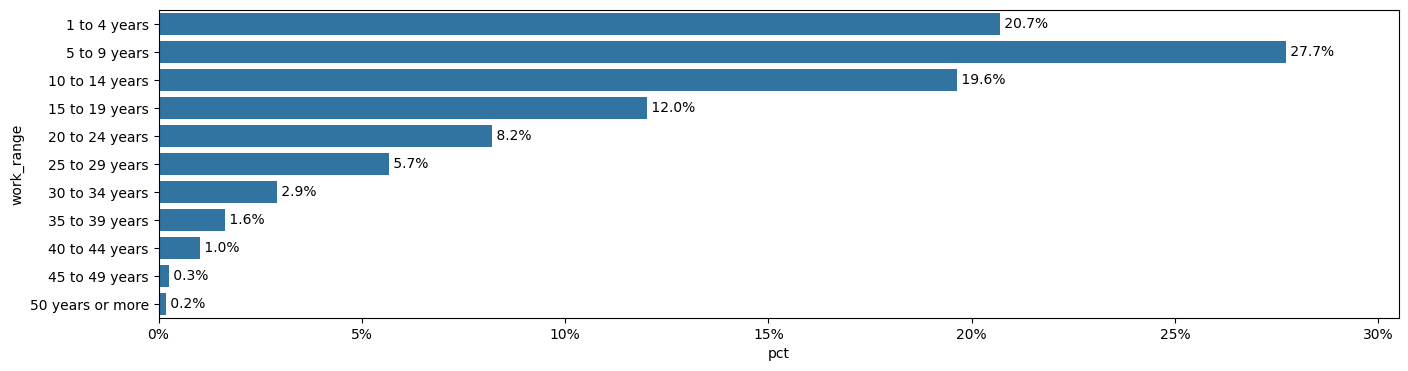

In [133]:
fig, ax = plt.subplots(figsize=(16,4))
ax.margins(x=0.1, y=0.02);

sns.barplot(data=workexp_final_df, x='pct', y='work_range');

for i in ax.containers:
    ax.bar_label(i, fmt = lambda x : f'{x : 0.1f}%')

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0, decimals=0))

- Ability to search within their company for information and knowledge

In [134]:
knowledge_1_df = survey_raw_df.Knowledge_1.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_1_df.rename(index={0:1, 1:0}, inplace=True)
knowledge_1_df = knowledge_1_df.sort_index()
knowledge_1_df

ans  sum_of_response
0              Strongly agree            10310
1                       Agree            13454
2  Neither agree nor disagree             2392
3                    Disagree             1813
4           Strongly disagree              695

In [135]:
knowledge_2_df = survey_raw_df.Knowledge_2.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_2_df.rename(index={3:0, 0:1, 1:2, 2:3, 4:4}, inplace=True)
knowledge_2_df = knowledge_2_df.sort_index()
knowledge_2_df

ans  sum_of_response
0              Strongly agree             3613
1                       Agree             9060
2  Neither agree nor disagree             7284
3                    Disagree             5958
4           Strongly disagree             2106

In [136]:
knowledge_3_df = survey_raw_df.Knowledge_3.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_3_df.rename(index={3:0, 0:1, 1:2, 2:3, 4:4}, inplace=True)
knowledge_3_df = knowledge_3_df.sort_index()
knowledge_3_df

ans  sum_of_response
0              Strongly agree             2730
1                       Agree            10979
2  Neither agree nor disagree             7421
3                    Disagree             5522
4           Strongly disagree             1443

In [137]:
knowledge_4_df = survey_raw_df.Knowledge_4.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_4_df.rename(index={3:0, 0:1, 1:2, 2:3, 4:4}, inplace=True)
knowledge_4_df = knowledge_4_df.sort_index()
knowledge_4_df

ans  sum_of_response
0              Strongly agree             3257
1                       Agree            12510
2  Neither agree nor disagree             7216
3                    Disagree             4188
4           Strongly disagree              859

In [138]:
knowledge_5_df = survey_raw_df.Knowledge_5.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_5_df.rename(index={2:0, 0:1, 1:2, 3:3, 4:4}, inplace=True)
knowledge_5_df = knowledge_5_df.sort_index()
knowledge_5_df

ans  sum_of_response
0              Strongly agree             5005
1                       Agree            14612
2  Neither agree nor disagree             5097
3                    Disagree             2610
4           Strongly disagree              556

In [139]:
knowledge_6_df = survey_raw_df.Knowledge_6.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_6_df.rename(index={3:0, 0:1, 1:2, 2:3, 4:4}, inplace=True)
knowledge_6_df = knowledge_6_df.sort_index()
knowledge_6_df

ans  sum_of_response
0              Strongly agree             3673
1                       Agree             9934
2  Neither agree nor disagree             7391
3                    Disagree             5900
4           Strongly disagree              966

In [140]:
knowledge_7_df = survey_raw_df.Knowledge_7.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_7_df.rename(index={3:0, 0:1, 1:2, 2:3, 4:4}, inplace=True)
knowledge_7_df = knowledge_7_df.sort_index()
knowledge_7_df

ans  sum_of_response
0              Strongly agree             4450
1                       Agree            10279
2  Neither agree nor disagree             6546
3                    Disagree             5416
4           Strongly disagree             1087

In [141]:
knowledge_8_df = survey_raw_df.Knowledge_8.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_8_df.rename(index={3:0, 0:1, 1:2, 2:3, 4:4}, inplace=True)
knowledge_8_df = knowledge_8_df.sort_index()
knowledge_8_df

ans  sum_of_response
0              Strongly agree             3067
1                       Agree            10759
2  Neither agree nor disagree             7046
3                    Disagree             5159
4           Strongly disagree             1727

In [142]:
knowledge_9_df = survey_raw_df.Knowledge_9.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
knowledge_9_df.rename(index={4:0, 0:1, 2:2, 3:3, 1:4}, inplace=True)
knowledge_9_df = knowledge_9_df.sort_index()
knowledge_9_df

ans  sum_of_response
0              Strongly agree             2554
1                       Agree             6657
2  Neither agree nor disagree             6155
3                    Disagree             5890
4           Strongly disagree             6379

In [143]:
knowledge_df = pd.concat([knowledge_1_df, knowledge_2_df.sum_of_response, knowledge_3_df.sum_of_response, knowledge_4_df.sum_of_response, knowledge_5_df.sum_of_response, knowledge_6_df.sum_of_response, knowledge_7_df.sum_of_response, knowledge_8_df.sum_of_response, knowledge_9_df.sum_of_response],axis=1)
knowledge_df = knowledge_df.set_index('ans').rename_axis('')
knowledge_df.columns = ['knowledge_1_df', 'knowledge_2_df', 'knowledge_3_df', 'knowledge_4_df', 'knowledge_5_df', 'knowledge_6_df', 'knowledge_7_df', 'knowledge_8_df', 'knowledge_9_df']
knowledge_df

knowledge_1_df  knowledge_2_df  knowledge_3_df  \
                                                                             
Strongly agree                       10310            3613            2730   
Agree                                13454            9060           10979   
Neither agree nor disagree            2392            7284            7421   
Disagree                              1813            5958            5522   
Strongly disagree                      695            2106            1443   

                            knowledge_4_df  knowledge_5_df  knowledge_6_df  \
                                                                             
Strongly agree                        3257            5005            3673   
Agree                                12510           14612            9934   
Neither agree nor disagree            7216            5097            7391   
Disagree                              4188            2610            5900   
Strongly disagree                      859             556             966   

                            knowledge_7_df  knowledge_8_df  knowledge_9_df  
                                                                            
Strongly agree                        4450            3067            2554  
Agree                                10279           10759            6657  
Neither agree nor disagree            6546            7046            6155  
Disagree                              5416            5159            5890  
Strongly disagree                     1087            1727            6379

In [144]:
knowledge_pct_df = round(knowledge_df.div(knowledge_df.sum(axis=0), axis=1)*100,0)
knowledge_pct_df

knowledge_1_df  knowledge_2_df  knowledge_3_df  \
                                                                             
Strongly agree                        36.0            13.0            10.0   
Agree                                 47.0            32.0            39.0   
Neither agree nor disagree             8.0            26.0            26.0   
Disagree                               6.0            21.0            20.0   
Strongly disagree                      2.0             8.0             5.0   

                            knowledge_4_df  knowledge_5_df  knowledge_6_df  \
                                                                             
Strongly agree                        12.0            18.0            13.0   
Agree                                 45.0            52.0            36.0   
Neither agree nor disagree            26.0            18.0            27.0   
Disagree                              15.0             9.0            21.0   
Strongly disagree                      3.0             2.0             3.0   

                            knowledge_7_df  knowledge_8_df  knowledge_9_df  
                                                                            
Strongly agree                        16.0            11.0             9.0  
Agree                                 37.0            39.0            24.0  
Neither agree nor disagree            24.0            25.0            22.0  
Disagree                              19.0            19.0            21.0  
Strongly disagree                      4.0             6.0            23.0

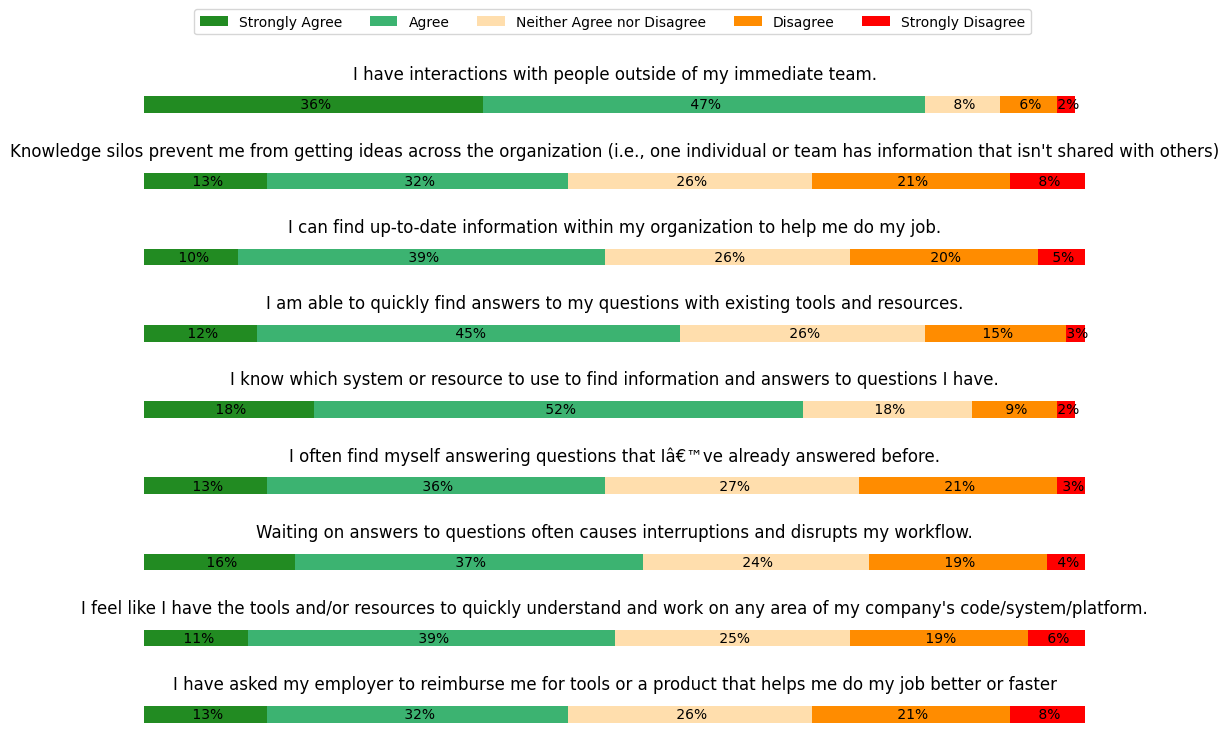

In [145]:
fig, ax = plt.subplots(9,1, figsize=(10, 7))
plt.xlim(0,100);
plt.tight_layout(pad=1.0);
colors = ['forestgreen','mediumseagreen','navajowhite','darkorange','red']

ax1=plt.subplot(9,1,1)
ax1.set_axis_off();
knowledge_pct_df.knowledge_1_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax1, color=colors,
                                                       title='I have interactions with people outside of my immediate team.');
for i in ax1.containers:
    ax1.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax2=plt.subplot(9,1,2)
ax2.set_axis_off();
knowledge_pct_df.knowledge_2_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax2, color=colors,
                                                       title='Knowledge silos prevent me from getting ideas across the organization (i.e., one individual or team has information that isn\'t shared with others)');
for i in ax2.containers:
    ax2.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax3=plt.subplot(9,1,3)
ax3.set_axis_off();
knowledge_pct_df.knowledge_3_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax3, color=colors,
                                                       title='I can find up-to-date information within my organization to help me do my job.');
for i in ax3.containers:
    ax3.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax4=plt.subplot(9,1,4)
ax4.set_axis_off();
knowledge_pct_df.knowledge_4_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax4, color=colors,
                                                       title='I am able to quickly find answers to my questions with existing tools and resources.');
for i in ax4.containers:
    ax4.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax5=plt.subplot(9,1,5)
ax5.set_axis_off();
knowledge_pct_df.knowledge_5_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax5, color=colors,
                                                       title='I know which system or resource to use to find information and answers to questions I have.');
for i in ax5.containers:
    ax5.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax6=plt.subplot(9,1,6)
ax6.set_axis_off();
knowledge_pct_df.knowledge_6_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax6, color=colors,
                                                       title='I often find myself answering questions that Iâ€™ve already answered before.');
for i in ax6.containers:
    ax6.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax7=plt.subplot(9,1,7)
ax7.set_axis_off();
knowledge_pct_df.knowledge_7_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax7, color=colors,
                                                       title='Waiting on answers to questions often causes interruptions and disrupts my workflow.');
for i in ax7.containers:
    ax7.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax8=plt.subplot(9,1,8)
ax8.set_axis_off();
knowledge_pct_df.knowledge_8_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax8, color=colors,
                                                       title='I feel like I have the tools and/or resources to quickly understand and work on any area of my company\'s code/system/platform.');
for i in ax8.containers:
    ax8.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax9=plt.subplot(9,1,9)
ax9.set_axis_off();
knowledge_pct_df.knowledge_2_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax9, color=colors,
                                                       title='I have asked my employer to reimburse me for tools or a product that helps me do my job better or faster');
for i in ax9.containers:
    ax9.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')
 
plt.legend(['Strongly Agree','Agree','Neither Agree nor Disagree', 'Disagree', 'Strongly Disagree'], bbox_to_anchor=(0.95, 22), ncol=5);

- 56% of respondents said they can find solutions to their questions fast, and 70% agreed or strongly agreed that they know where to go.
- How fast is fast enough? Even if they are aware of where to look for the answers, 53% of respondents agree or strongly agree that waiting for responses interferes with their productivity.

- Productivity frictions' frequency

In [146]:
frequency_1_df = survey_raw_df.Frequency_1.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
frequency_1_df.rename(index={1:0, 0:1, 2:2, 3:3, 4:4}, inplace=True)
frequency_1_df = frequency_1_df.sort_index()
frequency_1_df

ans  sum_of_response
0              Never             7607
1   1-2 times a week            16989
2   3-5 times a week             2721
3  6-10 times a week              569
4   10+ times a week              483

In [147]:
frequency_2_df = survey_raw_df.Frequency_2.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
frequency_2_df.rename(index={4:0, 0:1, 1:2, 3:3, 2:4}, inplace=True)
frequency_2_df = frequency_2_df.sort_index()
frequency_2_df

ans  sum_of_response
0              Never             2733
1   1-2 times a week            12578
2   3-5 times a week             6514
3  6-10 times a week             3069
4   10+ times a week             3470

In [148]:
frequency_3_df = survey_raw_df.Frequency_3.dropna().value_counts().rename_axis('ans').reset_index(name='sum_of_response')
frequency_3_df.rename(index={1:0, 0:1, 2:2, 3:3, 4:4}, inplace=True)
frequency_3_df = frequency_3_df.sort_index()
frequency_3_df

ans  sum_of_response
0              Never             8206
1   1-2 times a week            14426
2   3-5 times a week             3447
3  6-10 times a week              863
4   10+ times a week              768

In [149]:
frequency_df = pd.concat([frequency_1_df, frequency_2_df.sum_of_response, frequency_3_df.sum_of_response],axis=1)
frequency_df = frequency_df.set_index('ans').rename_axis('')
frequency_df.columns = ['frequency_1_df', 'frequency_2_df', 'frequency_3_df']
frequency_df

frequency_1_df  frequency_2_df  frequency_3_df
                                                                 
Never                        7607            2733            8206
1-2 times a week            16989           12578           14426
3-5 times a week             2721            6514            3447
6-10 times a week             569            3069             863
10+ times a week              483            3470             768

In [150]:
frequency_pct_df = round(frequency_df.div(frequency_df.sum(axis=0), axis=1)*100,1)
frequency_pct_df

frequency_1_df  frequency_2_df  frequency_3_df
                                                                 
Never                        26.8             9.6            29.6
1-2 times a week             59.9            44.3            52.1
3-5 times a week              9.6            23.0            12.4
6-10 times a week             2.0            10.8             3.1
10+ times a week              1.7            12.2             2.8

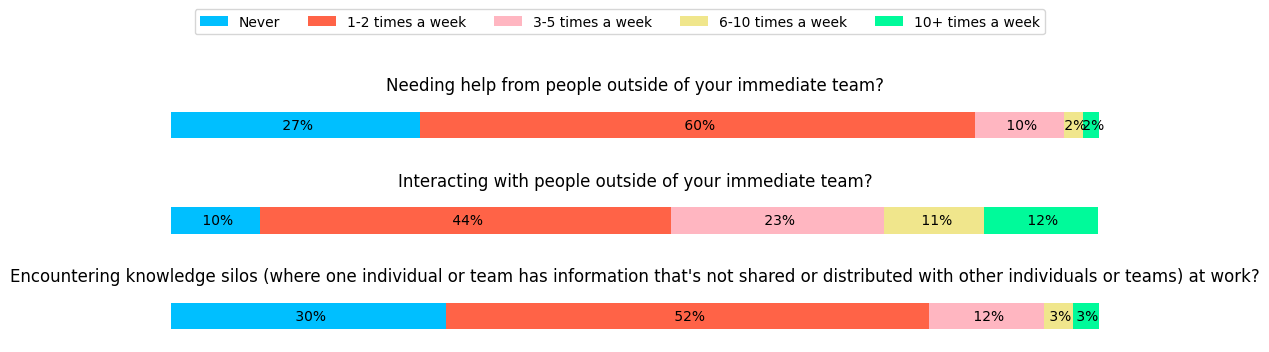

In [151]:
fig, ax = plt.subplots(3,1, figsize=(10,3))
plt.xlim(0,100);
plt.tight_layout(pad=1.0);
colors = ['deepskyblue','tomato','lightpink','khaki','mediumspringgreen']

ax1=plt.subplot(3,1,1)
ax1.set_axis_off();
frequency_pct_df.frequency_1_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax1, color=colors,
                                                       title='Needing help from people outside of your immediate team?');
for i in ax1.containers:
    ax1.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax2=plt.subplot(3,1,2)
ax2.set_axis_off();
frequency_pct_df.frequency_2_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax2, color=colors,
                                                       title='Interacting with people outside of your immediate team?');
for i in ax2.containers:
    ax2.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')

ax3=plt.subplot(3,1,3)
ax3.set_axis_off();
frequency_pct_df.frequency_3_df.to_frame().T.plot.barh(stacked=True, legend=False, xlim=(0,100), ax=ax3, color=colors,
                                                       title='Encountering knowledge silos (where one individual or team has information that\'s not shared or distributed with other individuals or teams) at work?');
for i in ax3.containers:
    ax3.bar_label(i, label_type='center', fmt = lambda x : f'{x : 0.0f}%')
 
plt.legend(['Never','1-2 times a week','3-5 times a week', '6-10 times a week', '10+ times a week'], bbox_to_anchor=(0.95, 6.5), ncol=5);

- Thirty percent of developers report that information silos affect their productivity at least 10 times a week.
- Although just 45% of people agree or strongly agree that knowledge silos are a nuisance, they are a common issue if you have them.

- Everyday time spent looking for solutions or answers.
- This covers the time you spend looking for information on your own, asking a coworker, and waiting for a response.

In [152]:
time_searching_df = survey_raw_df.TimeSearching.dropna().value_counts().rename_axis('types').reset_index(name='sum_of_response')
time_searching_df.rename(index={3:0, 1:1, 0:2, 2:3, 4:4}, inplace=True)
time_searching_df = time_searching_df.sort_index(ascending=False)
time_searching_df

types  sum_of_response
4      Over 120 minutes a day             2191
3        60-120 minutes a day             5275
2         30-60 minutes a day            10951
1         15-30 minutes a day             7805
0  Less than 15 minutes a day             2689

In [153]:
time_searching_df['pct'] = round(time_searching_df.sum_of_response * 100.0 / time_searching_df.sum_of_response.sum(),2)
time_searching_df

types  sum_of_response    pct
4      Over 120 minutes a day             2191   7.58
3        60-120 minutes a day             5275  18.25
2         30-60 minutes a day            10951  37.88
1         15-30 minutes a day             7805  27.00
0  Less than 15 minutes a day             2689   9.30

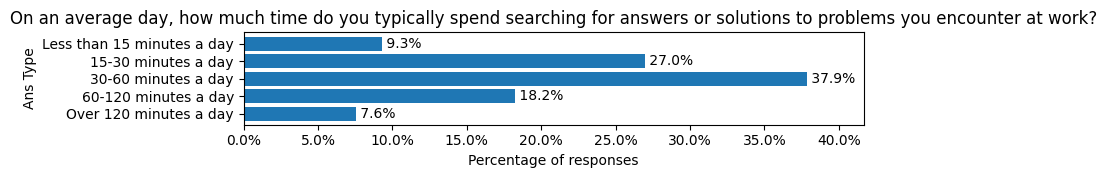

In [154]:
fig, ax = plt.subplots(figsize=(8,1.2));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(time_searching_df.types, time_searching_df.pct);

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of responses');
plt.ylabel('Ans Type');
plt.title('On an average day, how much time do you typically spend searching for answers or solutions to problems you encounter at work?');

- More than 30 minutes a day are spent looking for solutions or answers to issues, according to 61% of all respondents.

- Time spent per day responding to inquiries.

In [155]:
time_answering_df = survey_raw_df.TimeAnswering.dropna().value_counts().rename_axis('types').reset_index(name='sum_of_response')
time_answering_df.rename(index={2:0, 0:1, 1:2, 3:3, 4:4}, inplace=True)
time_answering_df = time_answering_df.sort_index(ascending=False)
time_answering_df

types  sum_of_response
4      Over 120 minutes a day             1239
3        60-120 minutes a day             3704
2         30-60 minutes a day             8642
1         15-30 minutes a day             9341
0  Less than 15 minutes a day             5918

In [156]:
time_answering_df['pct'] = round(time_answering_df.sum_of_response * 100.0 / time_answering_df.sum_of_response.sum(),2)
time_answering_df

types  sum_of_response    pct
4      Over 120 minutes a day             1239   4.30
3        60-120 minutes a day             3704  12.84
2         30-60 minutes a day             8642  29.96
1         15-30 minutes a day             9341  32.38
0  Less than 15 minutes a day             5918  20.52

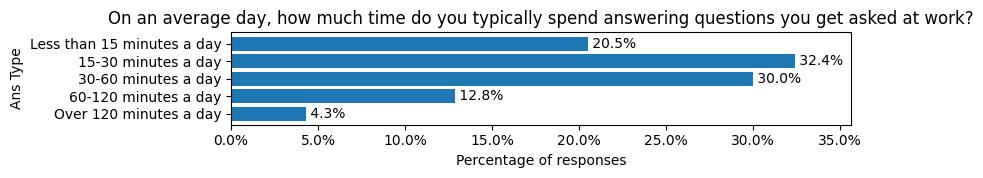

In [157]:
fig, ax = plt.subplots(figsize=(8,1.2));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(time_answering_df.types, time_answering_df.pct);

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of responses');
plt.ylabel('Ans Type');
plt.title('On an average day, how much time do you typically spend answering questions you get asked at work?');

- Around 62% people spend 15-60 minutes of time answering questions.

##### 3.5.2. Developer Experience

- Let's investigate the programs, tools, and programs that a company has.

In [158]:
professional_tech_df = split_multi_ans_column(survey_raw_df.ProfessionalTech.dropna()).sum().rename_axis('types').reset_index(name='sum_of_response')
professional_tech_df['pct'] = round(professional_tech_df.sum_of_response * 100.0 / survey_raw_df.ProfessionalTech.dropna().count(),2)
professional_tech_df

types  sum_of_response    pct
0                                    DevOps function            16185  58.29
1                                  Automated testing            15629  56.29
2                                Observability tools            10629  38.28
3                        Knowledge sharing community            11069  39.87
4                     AI-assisted technology tool(s)             8994  32.39
5                                      Microservices            12839  46.24
6  Developer portal or other central places to fi...             8060  29.03
7  Continuous integration (CI) and (more often) c...            19044  68.59
8                             Innersource initiative             4333  15.61
9                                      None of these             2894  10.42

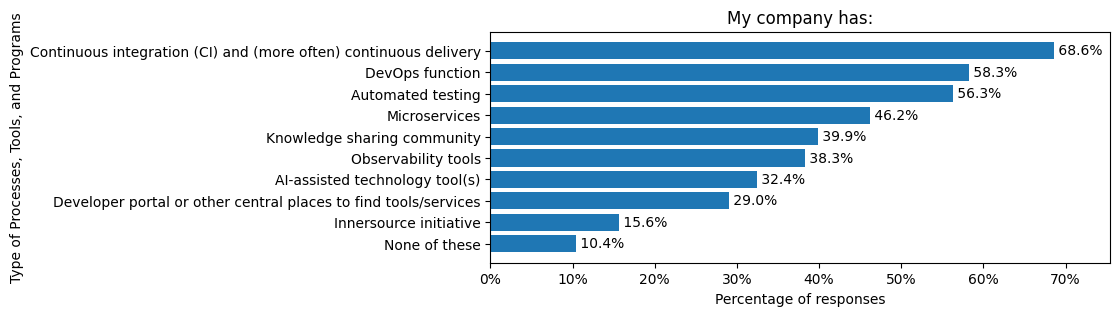

In [159]:
fig, ax = plt.subplots(figsize=(8,3));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(professional_tech_df.sort_values(by='pct').types, professional_tech_df.pct.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of responses');
plt.ylabel('Type of Processes, Tools, and Programs');
plt.title('My company has:');

- Most professional developers report having CI/CD, DevOps, and automated testing available at their organization.

- Where to go for resources to answer technical queries at work

In [160]:
pro_question_df = survey_raw_df.ProfessionalQuestion.dropna().value_counts().rename_axis('types').reset_index(name='sum_of_response')
pro_question_df['pct'] = round(pro_question_df.sum_of_response * 100.0 / pro_question_df.sum_of_response.sum(),2)
pro_question_df

types  sum_of_response    pct
0                   Traditional public search engine            15813  54.89
1                                         A coworker             5324  18.48
2                           AI-powered search (free)             2251   7.81
3                           AI-powered search (paid)             1947   6.76
4                                       Slack search             1053   3.66
5  Do search of internal share drives/storage loc...              937   3.25
6                          Internal Developer portal              777   2.70
7                                             Other:              559   1.94
8                             Microsoft Teams search              146   0.51

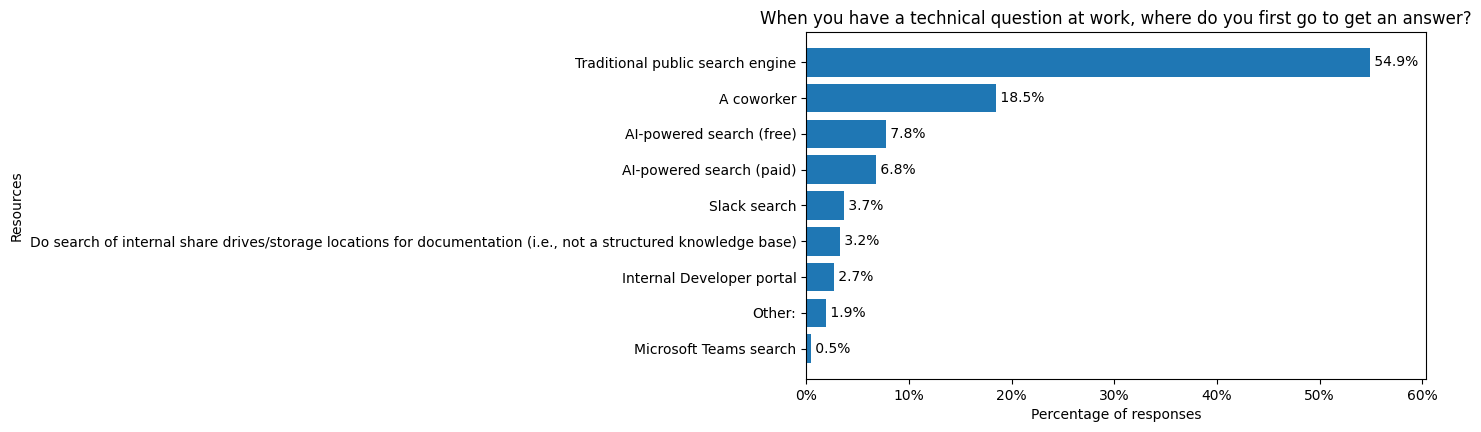

In [161]:
fig, ax = plt.subplots(figsize=(8,4.5));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(pro_question_df.sort_values(by='pct').types, pro_question_df.pct.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of responses');
plt.ylabel('Resources');
plt.title('When you have a technical question at work, where do you first go to get an answer?');

- Public search engines are the top resource used by professional developers to find answers to technical questions. 55% use traditional search and 15% use AI-powered search, either free or paid.

- Most common frustrations at work place.

In [162]:
frustration_df = split_multi_ans_column(survey_raw_df.Frustration.dropna()).sum().rename_axis('types').reset_index(name='sum_of_response')
frustration_df['pct'] = round(frustration_df.sum_of_response * 100.0 / survey_raw_df.Frustration.dropna().count(),2)
frustration_df

types  sum_of_response    pct
0                            Amount of technical debt            17614  62.35
1                     Number of software tools in use             6432  22.77
2                                    Tracking my work             7652  27.09
3                            Showing my contributions             5546  19.63
4             Complexity of tech stack for deployment             9132  32.32
5                  Complexity of tech stack for build             9284  32.86
6         Maintaining security of code being produced             5253  18.59
7                   Patching/updating core components             7091  25.10
8   Maintaining security of systems/platforms used...             4351  15.40
9           Reliability of tools/systems used in work             8904  31.52
10                                      None of these             2450   8.67

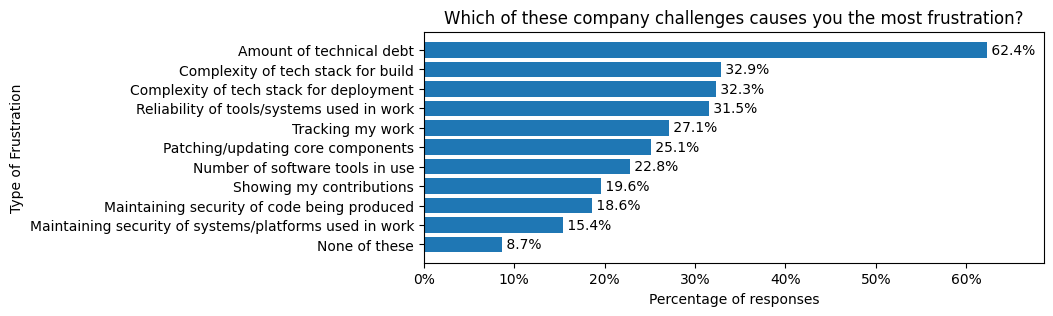

In [163]:
fig, ax = plt.subplots(figsize=(8,3));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(frustration_df.sort_values(by='pct').types, frustration_df.pct.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of responses');
plt.ylabel('Type of Frustration');
plt.title('Which of these company challenges causes you the most frustration?');

- According to 63% of respondents, professional developers' biggest workplace annoyance is technical debt.
- So, lets see whats 'Individual contributor' and 'People manager' think about this.

In [164]:
frustration_ind_df = split_multi_ans_column(survey_raw_df['Frustration'].loc[survey_raw_df.ICorPM == 'Individual contributor'].dropna()).sum().rename_axis('types').reset_index(name='sum_of_response')
frustration_ind_df['pct'] = round(frustration_ind_df.sum_of_response * 100.0 / survey_raw_df['Frustration'].loc[survey_raw_df.ICorPM == 'Individual contributor'].dropna().count(),2)
frustration_ind_df = frustration_ind_df.sort_values(by='pct', ascending=False)
frustration_ind_df

types  sum_of_response    pct
0                            Amount of technical debt            15233  62.34
5                  Complexity of tech stack for build             8174  33.45
4             Complexity of tech stack for deployment             7990  32.70
9           Reliability of tools/systems used in work             7720  31.60
2                                    Tracking my work             6550  26.81
7                   Patching/updating core components             6093  24.94
1                     Number of software tools in use             5533  22.64
3                            Showing my contributions             4895  20.03
6         Maintaining security of code being produced             4306  17.62
8   Maintaining security of systems/platforms used...             3527  14.43
10                                      None of these             2087   8.54

In [165]:
frustration_pm_df = split_multi_ans_column(survey_raw_df['Frustration'].loc[survey_raw_df.ICorPM == 'People manager'].dropna()).sum().rename_axis('types').reset_index(name='sum_of_response')
frustration_pm_df['pct'] = round(frustration_pm_df.sum_of_response * 100.0 / survey_raw_df['Frustration'].loc[survey_raw_df.ICorPM == 'People manager'].dropna().count(),2)
frustration_pm_df = frustration_pm_df.sort_values(by='pct', ascending=False)
frustration_pm_df

types  sum_of_response    pct
0                            Amount of technical debt             2332  62.44
5           Reliability of tools/systems used in work             1164  31.16
3             Complexity of tech stack for deployment             1121  30.01
4                  Complexity of tech stack for build             1086  29.08
1                                    Tracking my work             1076  28.81
9                   Patching/updating core components              984  26.35
7         Maintaining security of code being produced              938  25.11
6                     Number of software tools in use              880  23.56
8   Maintaining security of systems/platforms used...              811  21.71
2                            Showing my contributions              645  17.27
10                                      None of these              356   9.53

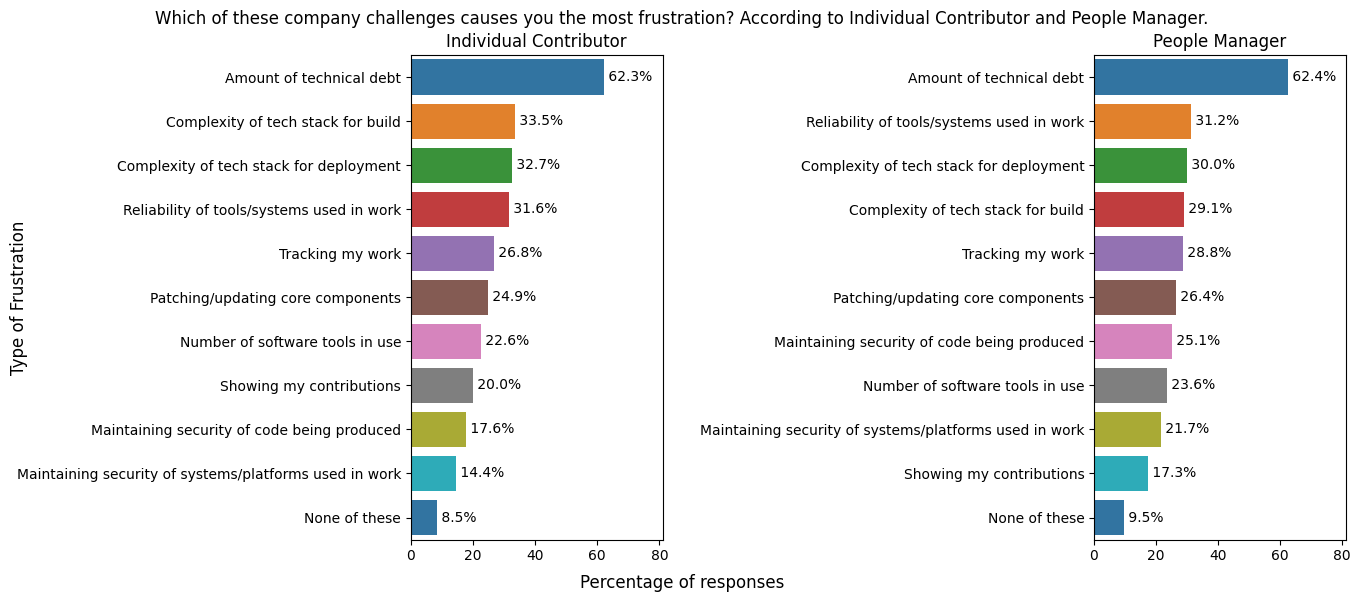

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(14,6));

plt.subplot(1,2,1)
ax1 = sns.barplot(x=frustration_ind_df.pct, y=frustration_ind_df.types, hue=frustration_ind_df.types, palette='tab10');
plt.title('Individual Contributor')
ax1.margins(x=0.3)
for i in ax1.containers:
    ax1.bar_label(i, fmt = lambda x : f'{x : 0.1f}%')
ax1.set_ylabel('');
ax1.set_xlabel('');

plt.subplot(1,2,2)
ax2 = sns.barplot(x=frustration_pm_df.pct, y=frustration_pm_df.types, hue=frustration_pm_df.types, palette='tab10');
plt.title('People Manager')
ax2.margins(x=0.3)
for i in ax2.containers:
    ax2.bar_label(i, fmt = lambda x : f'{x : 0.1f}%')
ax2.set_ylabel('');
ax2.set_xlabel('');

plt.tight_layout(pad=2.5);
plt.suptitle('Which of these company challenges causes you the most frustration? According to Individual Contributor and People Manager.');

fig.supxlabel('Percentage of responses');
fig.supylabel('Type of Frustration');

- Regardless of whether they are people managers or individual contributors, 63% of respondents stated that their biggest source of dissatisfaction at work is technical debt for skilled developers.
- They disagree, meanwhile, on how annoying unreliable tools and services at work may be; although people managers concur that this is second only to tech debt, individual contributors feel that constructing or deploying sophisticated tech stacks to be a little more annoying.

#### 3.5.3 Job Industry and Satisfaction

- Lets look for The industry in which the responders work.

In [167]:
industry_df = survey_raw_df.Industry[survey_raw_df.Industry != 'Other:'].dropna().value_counts().rename_axis('types').reset_index(name='sum_of_response')
industry_df['pct'] = round(industry_df.sum_of_response * 100.0 / survey_raw_df.Industry.dropna().count(),2)
industry_df

types  sum_of_response    pct
0                         Software Development            11918  41.30
1                                      Fintech             1641   5.69
2   Internet, Telecomm or Information Services             1629   5.64
3                   Banking/Financial Services             1371   4.75
4                                   Healthcare             1277   4.43
5                                Manufacturing             1265   4.38
6                 Retail and Consumer Services             1264   4.38
7                                   Government              962   3.33
8                 Media & Advertising Services              894   3.10
9                             Higher Education              890   3.08
10             Transportation, or Supply Chain              859   2.98
11        Computer Systems Design and Services              844   2.92
12                                      Energy              578   2.00
13                                   Insurance              389   1.35

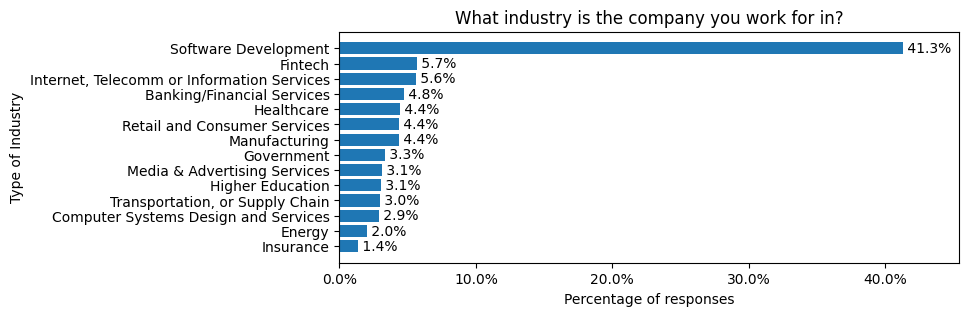

In [168]:
fig, ax = plt.subplots(figsize=(8,3));
ax.margins(x=0.1, y=0.05);

bars = plt.barh(industry_df.sort_values(by='pct').types, industry_df.pct.sort_values());

ax.bar_label(ax.containers[0], fmt = lambda x : f'{x : 0.1f}%');

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0))

plt.xlabel('Percentage of responses');
plt.ylabel('Type of Industry');
plt.title('What industry is the company you work for in?');

- One of the top industries for developers is still software development.
- In this year's poll, 41% of participants who answered the professional developer question are employed in the software development sector.

- Let's assess how satisfied respondents are with their current job.

In [169]:
job_sat_df = survey_raw_df.JobSat.dropna().rename_axis('response').reset_index(name='counts')
job_sat_df

response  counts
0            10     8.0
1            12     8.0
2            15     5.0
3            18    10.0
4            20     6.0
...         ...     ...
29121     65178     8.0
29122     65241     5.0
29123     65265     8.0
29124     65351     8.0
29125     65412     8.0

[29126 rows x 2 columns]

In [170]:
job_sat_cutoff = [-1, 6, 8, 10]
job_sat_labels = ('Not Happy at Work', 'Complacent at Work', 'Happy at Work')
job_sat_df['job_sat_bin'] = pd.cut(job_sat_df.counts, bins=job_sat_cutoff, labels=job_sat_labels)
job_sat_df

response  counts         job_sat_bin
0            10     8.0  Complacent at Work
1            12     8.0  Complacent at Work
2            15     5.0   Not Happy at Work
3            18    10.0       Happy at Work
4            20     6.0   Not Happy at Work
...         ...     ...                 ...
29121     65178     8.0  Complacent at Work
29122     65241     5.0   Not Happy at Work
29123     65265     8.0  Complacent at Work
29124     65351     8.0  Complacent at Work
29125     65412     8.0  Complacent at Work

[29126 rows x 3 columns]

In [171]:
job_sat_df = job_sat_df['job_sat_bin'].value_counts().rename_axis('job_sat_range').reset_index(name='sum_of_response')
# job_sat_df.rename(index={1:0, 0:1}, inplace=True)
# job_sat_df = job_sat_df.sort_index()
job_sat_df['pct'] = round(job_sat_df.sum_of_response*100 / job_sat_df.sum_of_response.sum(), 2)
job_sat_df

job_sat_range  sum_of_response    pct
0  Complacent at Work            13888  47.68
1   Not Happy at Work             9361  32.14
2       Happy at Work             5877  20.18

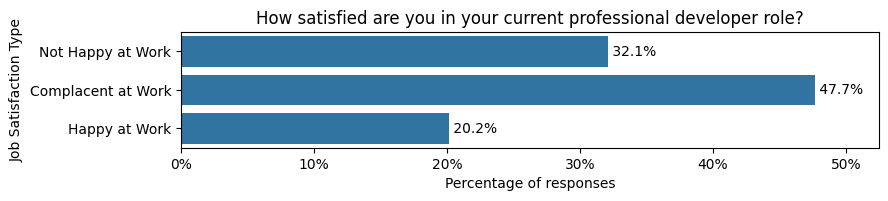

In [172]:
fig, ax = plt.subplots(figsize=(9,1.5))
ax.margins(x=0.1, y=0.005);

sns.barplot(data=job_sat_df, x='pct', y='job_sat_range');

for i in ax.containers:
    ax.bar_label(i, fmt = lambda x : f'{x : 0.1f}%')

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100.0, decimals=0))

plt.xlabel('Percentage of responses');
plt.ylabel('Job Satisfaction Type');
plt.title('How satisfied are you in your current professional developer role?');

- Only one in five professional developers are happy with their current job.
- They were asked whether they were satisfied with their current role, and 48% indicated they were complacent while 19% were satisfied.

### 4. Conclusion
Survey metadata and notes.

#### 4.1 General

- The results of this study are based on 65,437 answers from 185 countries.
- A total of 48,019 replies were utilized to generate the wage data.
- Due to the extra questions this year, we anticipated that qualifying replies to the survey would take an average of over 21 minutes to complete.
- On June 11, 2024, wages were translated from user currencies to USD using the exchange rate.
- In the replies we retained for study, qualifiers included an attention check question, a consent question, and the question "Which of the following options best describes you today?" Not utilized were almost 20K replies.
- Between May 19, 2024, and June 20, 2024, the survey was conducted.
- The main routes used to find respondents were those that belonged to Stack Overflow. Site message, blog entries, email and newsletter subscribers, banner advertisements, and social media posts were the primary sources of responses. Highly-engaged users on Stack Overflow were more likely to notice the prompts to take the survey during the collecting promotion because respondents were recruited in this manner.
- This year, rather of showing the overall frequency of replies, some questions with multiple choice answers will now be shown as a proportion of all unique responses.